In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import sklearn
import sklearn.metrics
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas
import mplhep
import pickle
import awkward
import particle
import uproot
import glob
import mplhep
import bz2

mplhep.style.use("CMS")

In [3]:
ELEM_LABELS_CMS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ELEM_NAMES_CMS = ["NONE", "TRACK", "PS1", "PS2", "ECAL", "HCAL", "GSF", "BREM", "HFEM", "HFHAD", "SC", "HO"]

CLASS_LABELS_CMS = [0, 211, 130, 1, 2, 22, 11, 13, 15]
CLASS_NAMES_CMS = ["none", "ch.had", "n.had", "HFHAD", "HFEM", "$\gamma$", "$e^\pm$", "$\mu^\pm$", r"$\tau^\pm$"]

In [4]:
def cms_label(ax, x0=0.01, x1=0.15, x2=0.98, y=0.94):
    plt.figtext(x0, y, "CMS", fontweight="bold", wrap=True, horizontalalignment="left", transform=ax.transAxes)
    plt.figtext(
        x1, y, "Simulation Preliminary", style="italic", wrap=True, horizontalalignment="left", transform=ax.transAxes
    )
    plt.figtext(x2, y, "Run 3 (14 TeV)", wrap=False, horizontalalignment="right", transform=ax.transAxes)


def cms_label_sample_label(ax, x0=0.01, x1=0.15, x2=0.98, y=0.94):
    plt.figtext(x0, y, "CMS", fontweight="bold", wrap=True, horizontalalignment="left", transform=ax.transAxes)
    plt.figtext(
        x1, y, "Simulation Preliminary", style="italic", wrap=True, horizontalalignment="left", transform=ax.transAxes
    )
    plt.figtext(x2, y, "Run 3 (14 TeV)", wrap=False, horizontalalignment="right", transform=ax.transAxes)
    plt.figtext(
        x0,
        y - 0.05,
        "$\mathrm{t}\overline{\mathrm{t}}$ events",
        wrap=True,
        horizontalalignment="left",
        transform=ax.transAxes,
    )


def sample_label(ax, additional_text="", x=0.01, y=0.87):
    plt.text(x, y, "$\mathrm{t}\overline{\mathrm{t}}$ events" + additional_text, ha="left", transform=ax.transAxes)

In [5]:
sample = "TTbar_14TeV_TuneCUETP8M1_cfi"

In [6]:
pickle_data = sum(
    [
        pickle.load(bz2.BZ2File(f, "r"))
        for f in list(glob.glob("../data/v2/ZTT_All_hadronic_14TeV_TuneCUETP8M1_cfi/raw/*.pkl.bz2"))[:20]
    ],
    [],
)

# pickle_data = sum([
#     pickle.load(open(f, "rb")) for f in list(glob.glob("../mlpf/data_cms/ZTT_All_hadronic_14TeV_TuneCUETP8M1_cfi/1/pfntuple_1.pkl"))], [])

In [7]:
Xelem_e = awkward.from_regular([np.array(p["Xelem"]["e"].tolist()) for p in pickle_data])
Xelem_pt = awkward.from_regular([np.array(p["Xelem"]["pt"].tolist()) for p in pickle_data])

ygen_e = awkward.from_regular([np.array(p["ygen"]["e"].tolist()) for p in pickle_data])
ycand_e = awkward.from_regular([np.array(p["ycand"]["e"].tolist()) for p in pickle_data])

ycand_q = awkward.from_regular([np.array(p["ycand"]["charge"].tolist()) for p in pickle_data])
ygen_q = awkward.from_regular([np.array(p["ygen"]["charge"].tolist()) for p in pickle_data])

ygen_pt = awkward.from_regular([np.array(p["ygen"]["pt"].tolist()) for p in pickle_data])
ycand_pt = awkward.from_regular([np.array(p["ycand"]["pt"].tolist()) for p in pickle_data])

Xelem_typ = awkward.from_regular([np.array(p["Xelem"]["typ"].tolist()) for p in pickle_data])
ygen_typ = awkward.from_regular([np.array(p["ygen"]["typ"].tolist()) for p in pickle_data])
ycand_typ = awkward.from_regular([np.array(p["ycand"]["typ"].tolist()) for p in pickle_data])

Xelem_eta = awkward.from_regular([np.array(p["Xelem"]["eta"].tolist()) for p in pickle_data])
ygen_eta = awkward.from_regular([np.array(p["ygen"]["eta"].tolist()) for p in pickle_data])
ycand_eta = awkward.from_regular([np.array(p["ycand"]["eta"].tolist()) for p in pickle_data])

ygen_sphi = awkward.from_regular([np.array(p["ygen"]["sin_phi"].tolist()) for p in pickle_data])
ycand_sphi = awkward.from_regular([np.array(p["ycand"]["sin_phi"].tolist()) for p in pickle_data])

Xelem_phi = awkward.from_regular([np.array(p["Xelem"]["phi"].tolist()) for p in pickle_data])
ygen_cphi = awkward.from_regular([np.array(p["ygen"]["cos_phi"].tolist()) for p in pickle_data])
ycand_cphi = awkward.from_regular([np.array(p["ycand"]["cos_phi"].tolist()) for p in pickle_data])

<ipython-input-8-84c16569a934>:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,10))


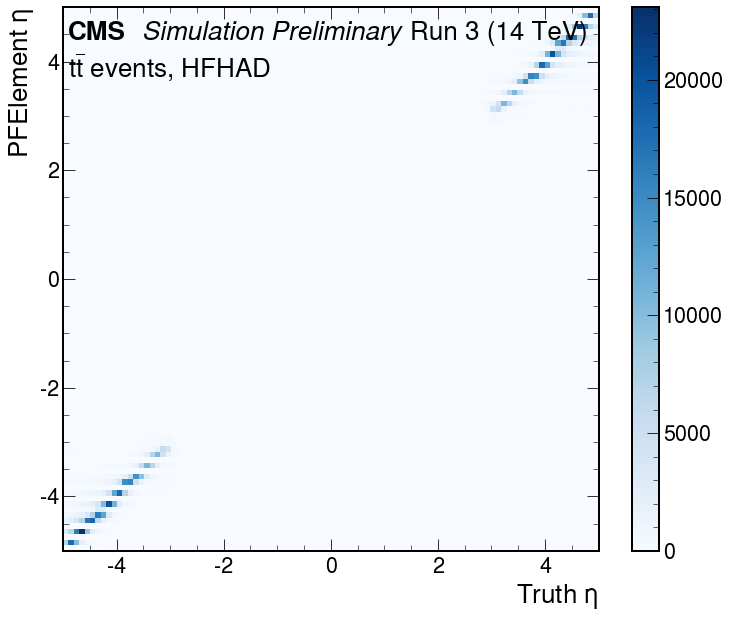

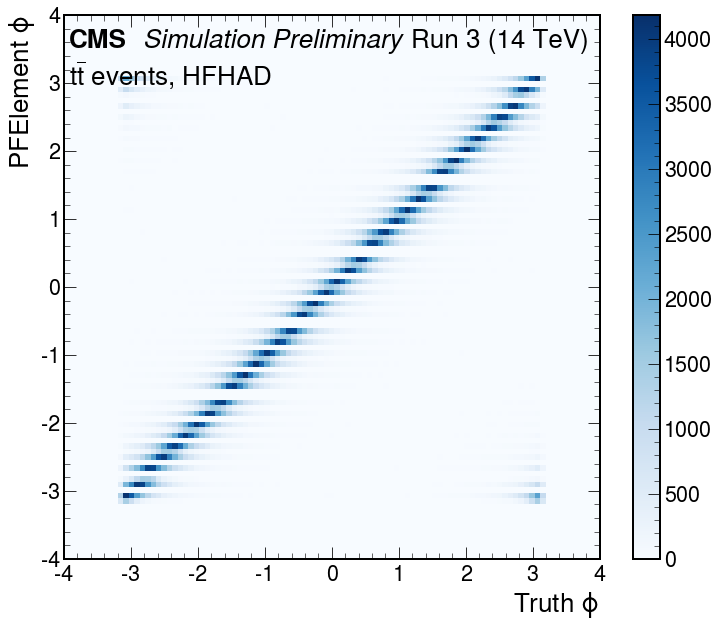

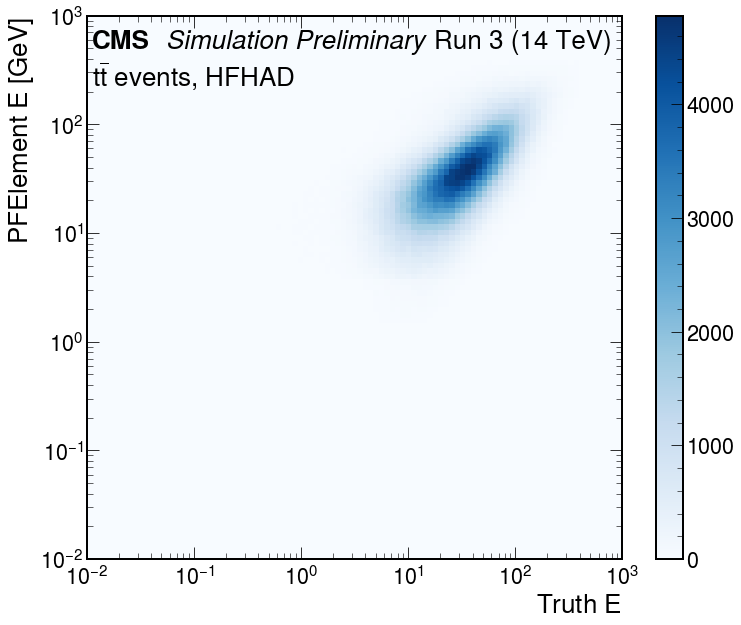

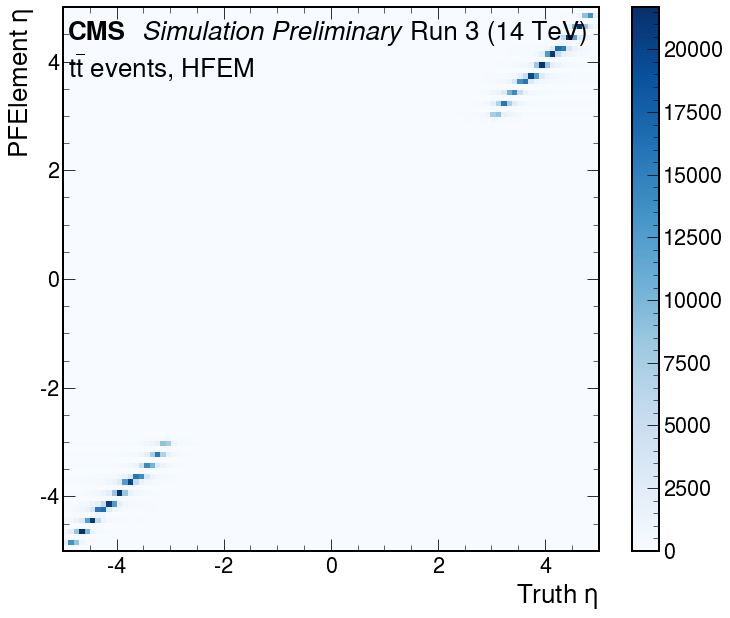

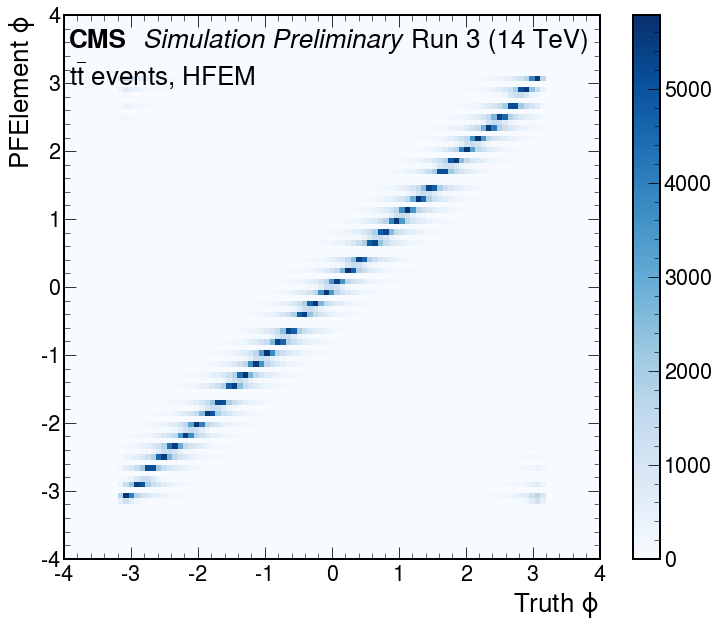

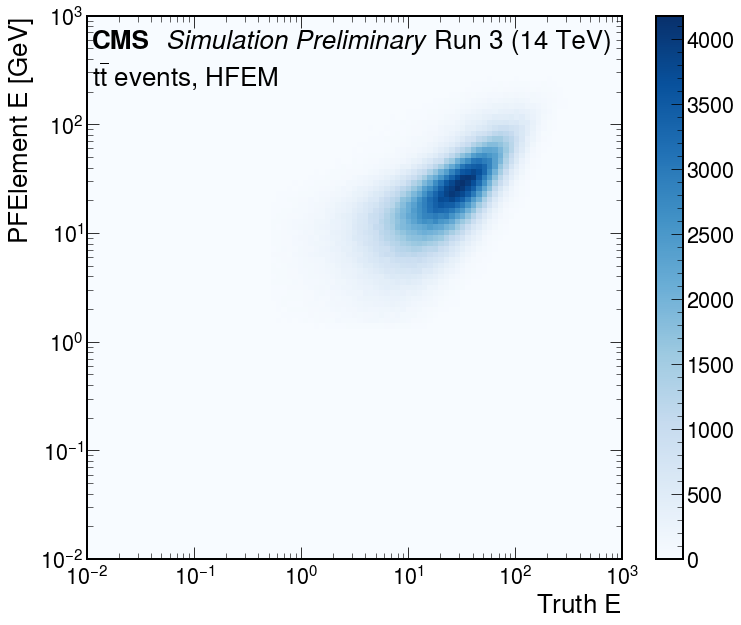

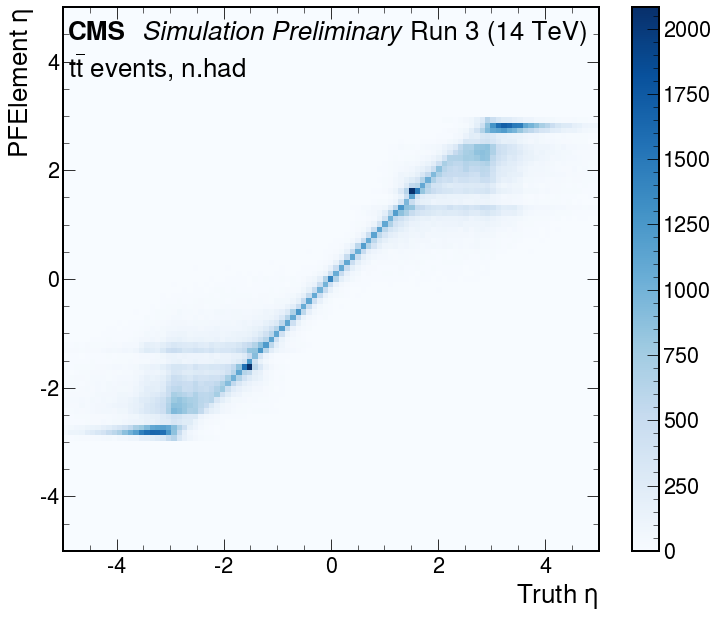

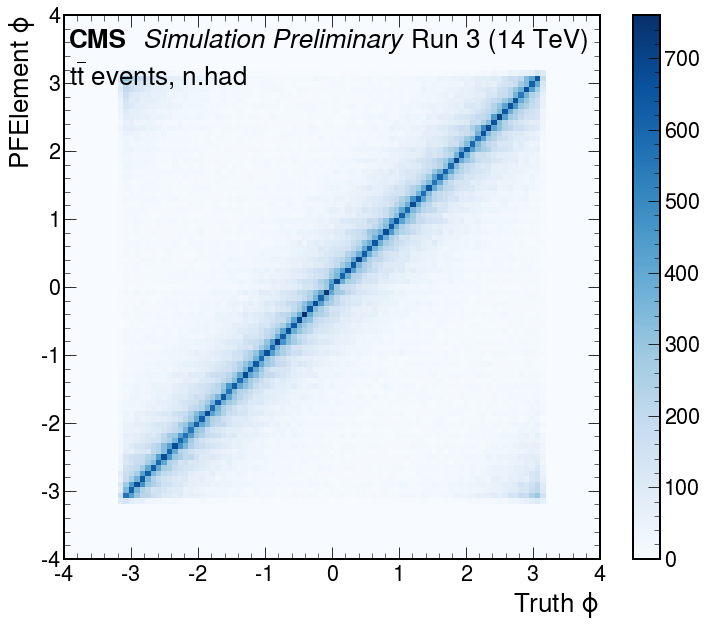

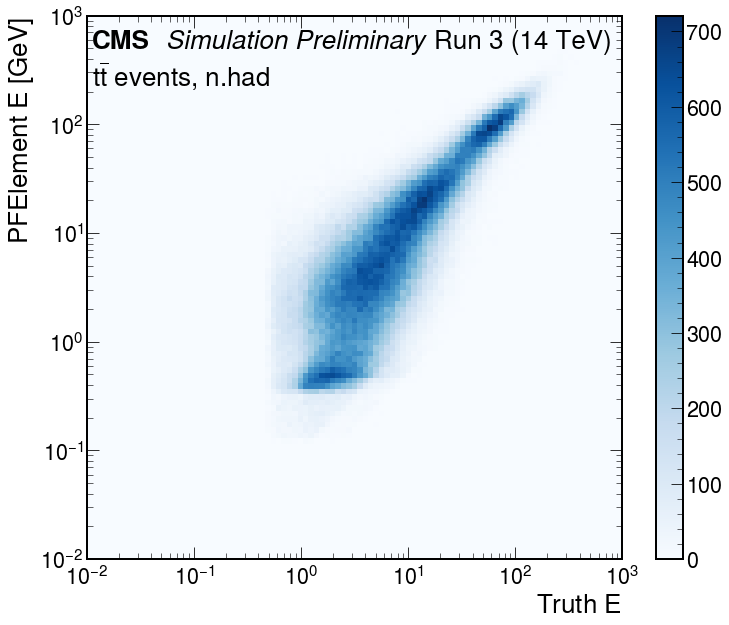

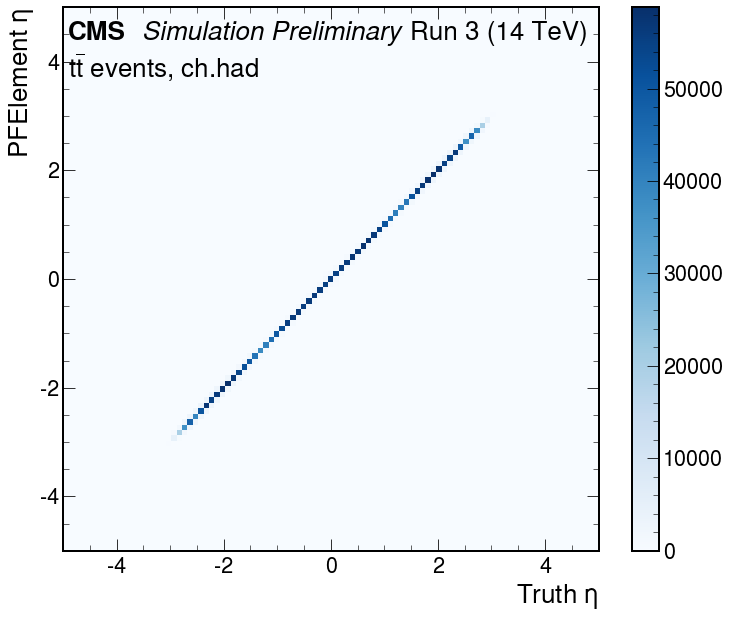

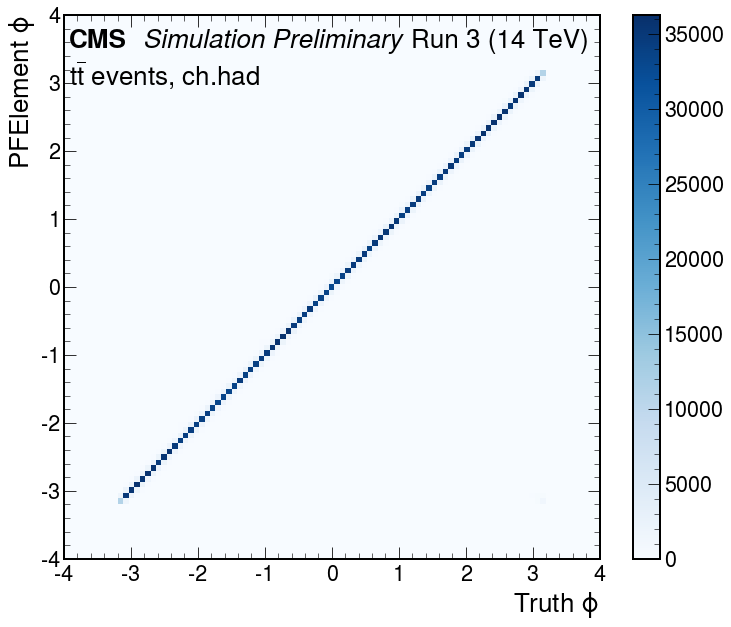

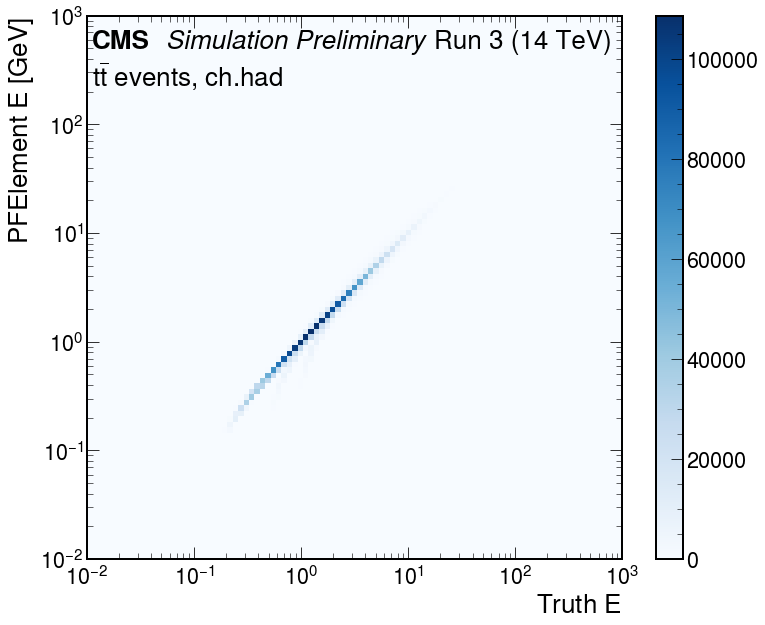

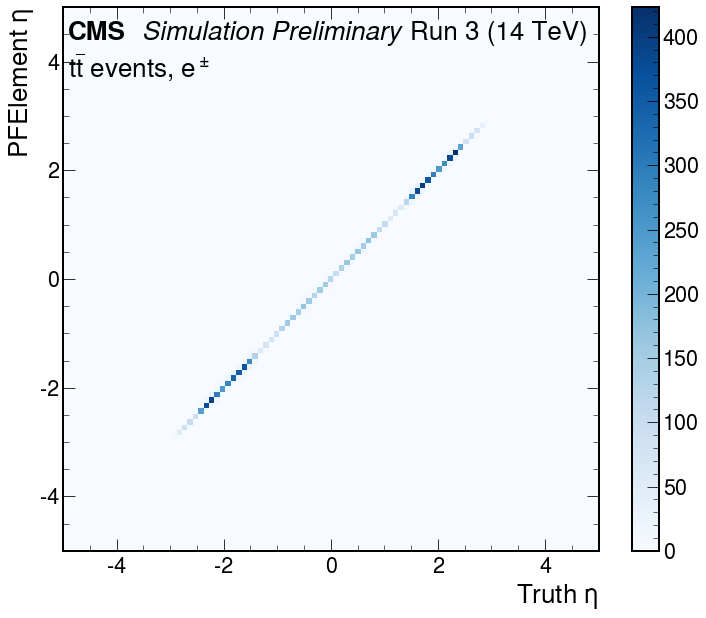

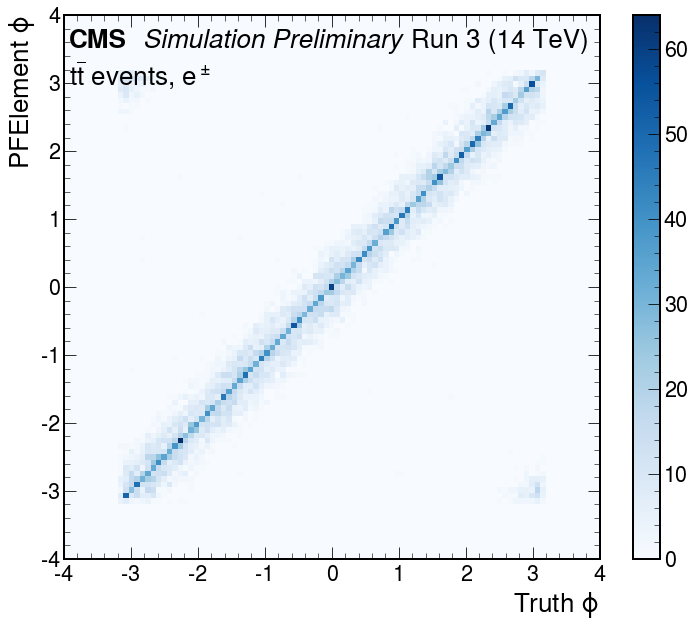

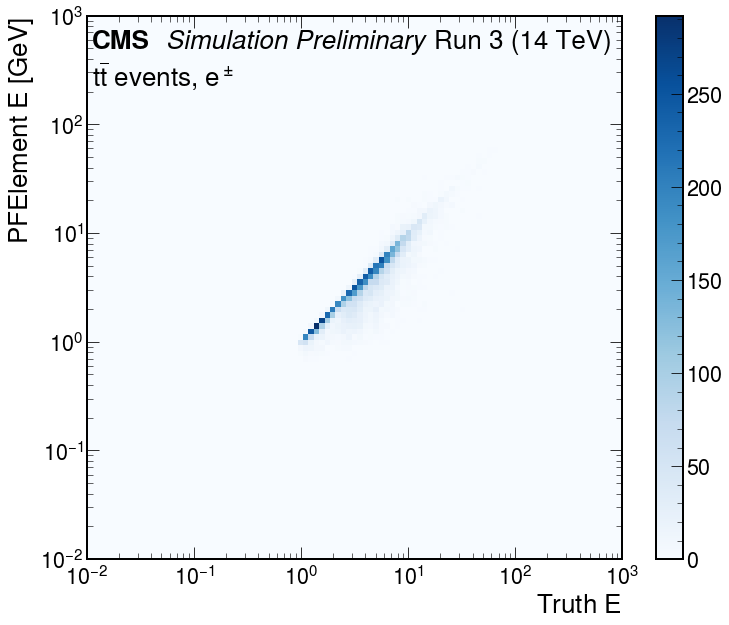

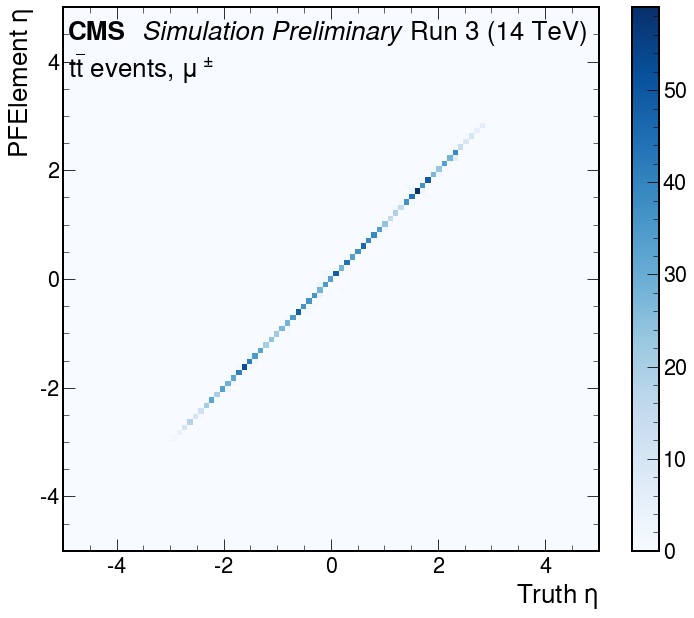

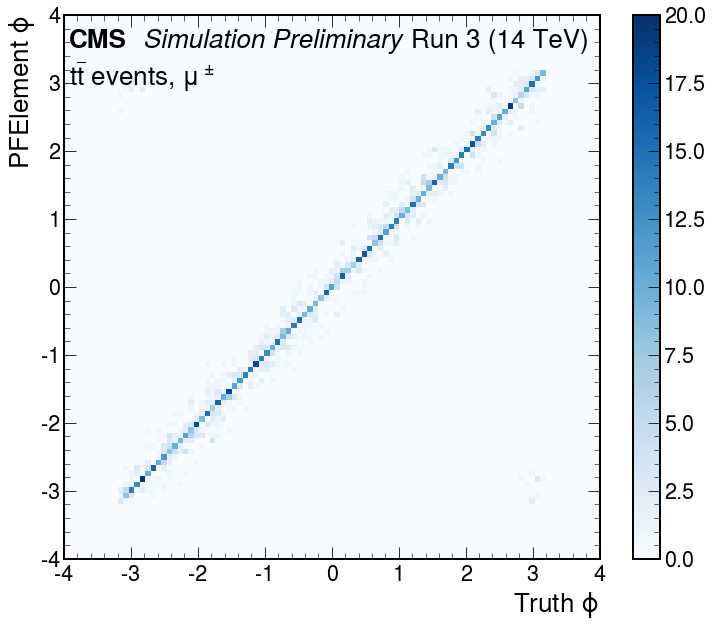

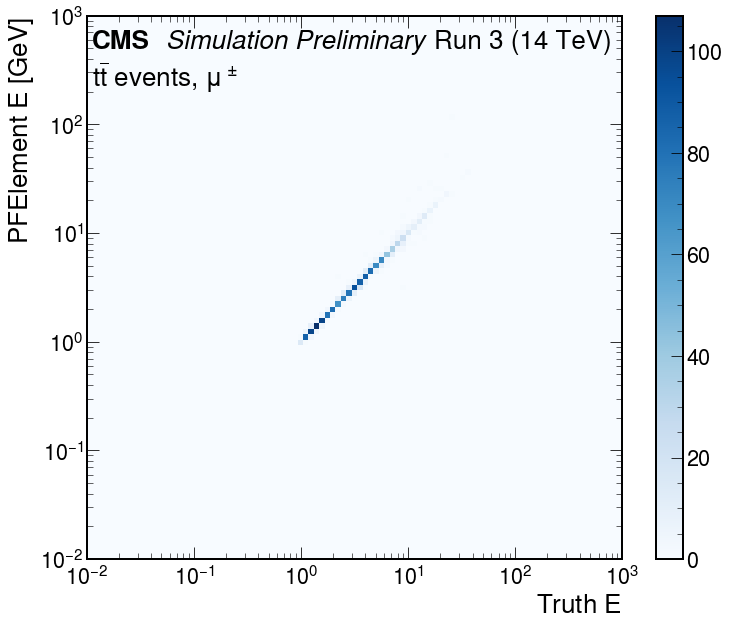

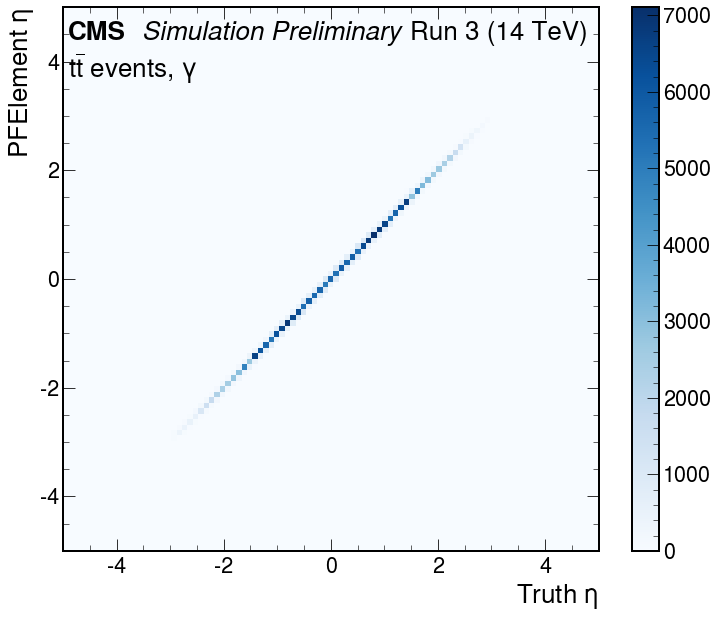

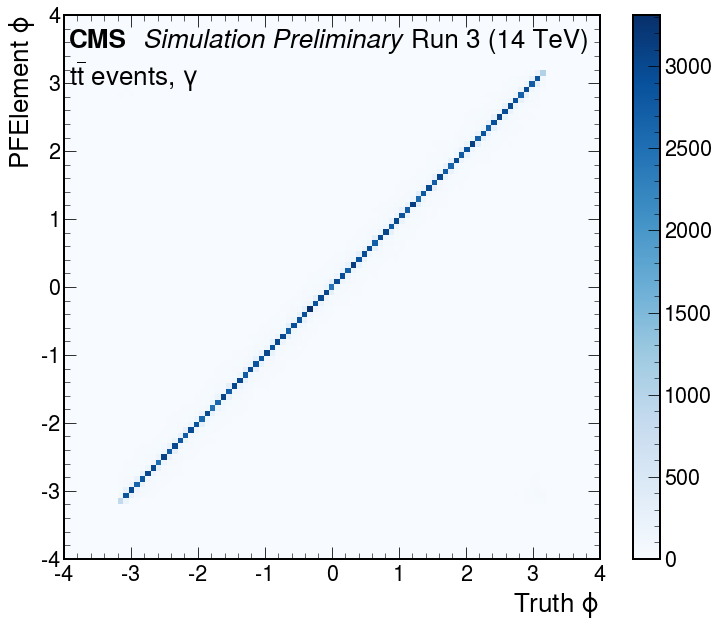

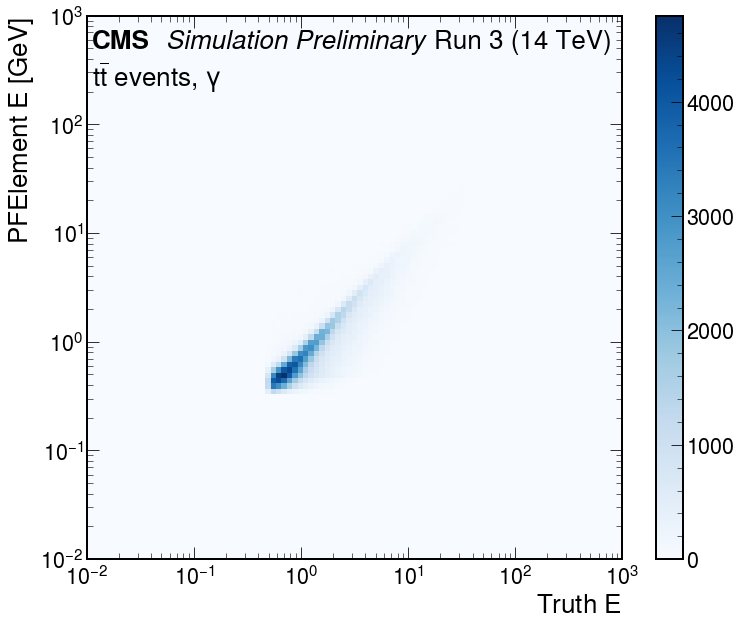

In [8]:
for pid in [1, 2, 130, 211, 11, 13, 22]:
    msk = ygen_typ == pid
    data1 = awkward.flatten(Xelem_eta[msk])
    data2 = awkward.flatten(ygen_eta[msk])

    plt.figure(figsize=(12, 10))
    ax = plt.axes()
    plt.hist2d(data2, data1, bins=(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)), cmap="Blues")
    plt.colorbar()
    cms_label(ax)
    sample_label(ax, ", " + CLASS_NAMES_CMS[CLASS_LABELS_CMS.index(pid)])
    plt.xlabel("Truth $\eta$")
    plt.ylabel("PFElement $\eta$")
    plt.savefig("truth_vs_pf_eta_{}.pdf".format(pid), bbox_inches="tight")

    data1 = awkward.flatten(Xelem_phi[msk])
    data2 = awkward.flatten(np.arctan2(ygen_sphi[msk], ygen_cphi[msk]))
    plt.figure(figsize=(12, 10))
    ax = plt.axes()
    plt.hist2d(data2, data1, bins=(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)), cmap="Blues")
    plt.colorbar()
    cms_label(ax)
    sample_label(ax, ", " + CLASS_NAMES_CMS[CLASS_LABELS_CMS.index(pid)])

    plt.xlabel("Truth $\phi$")
    plt.ylabel("PFElement $\phi$")
    plt.savefig("truth_vs_pf_phi_{}.pdf".format(pid), bbox_inches="tight")

    data1 = awkward.flatten(Xelem_e[msk])
    data2 = awkward.flatten(ygen_e[msk])

    plt.figure(figsize=(12, 10))
    ax = plt.axes()
    plt.hist2d(data2, data1, bins=(np.logspace(-2, 3, 100), np.logspace(-2, 3, 100)), cmap="Blues")
    plt.xscale("log")
    plt.yscale("log")
    plt.colorbar()
    cms_label(ax)
    sample_label(ax, ", " + CLASS_NAMES_CMS[CLASS_LABELS_CMS.index(pid)])
    plt.xlabel("Truth $E$")
    plt.ylabel("PFElement $E$ [GeV]")
    plt.savefig("truth_vs_pf_e_{}.pdf".format(pid), bbox_inches="tight")

In [9]:
Xelem_typ_f = np.array(awkward.flatten(Xelem_typ))

ygen_typ_f = np.array(awkward.flatten(ygen_typ))
ygen_typ_id = np.zeros(len(ygen_typ_f), dtype=np.int32)
for i in range(len(CLASS_LABELS_CMS)):
    ygen_typ_id[ygen_typ_f == CLASS_LABELS_CMS[i]] = i

ycand_typ_f = np.array(awkward.flatten(ycand_typ))
ycand_typ_id = np.zeros(len(ycand_typ_f), dtype=np.int32)
for i in range(len(CLASS_LABELS_CMS)):
    ycand_typ_id[ycand_typ_f == CLASS_LABELS_CMS[i]] = i

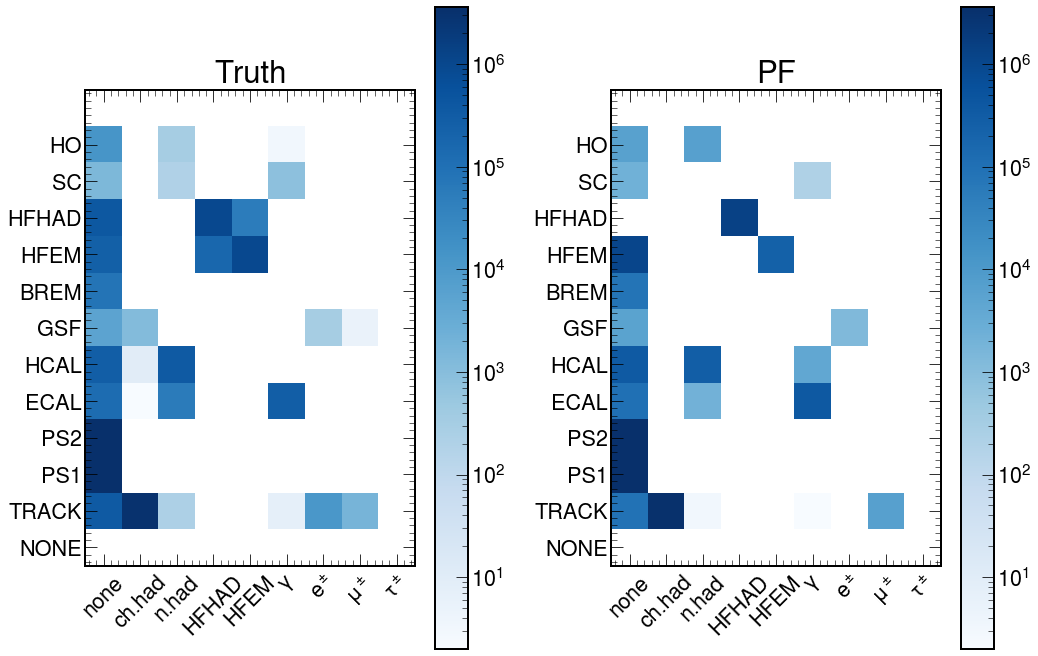

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
cm = sklearn.metrics.confusion_matrix(
    Xelem_typ_f,
    ygen_typ_id,
    labels=range(0, 13),
)
plt.imshow(cm, cmap="Blues", norm=matplotlib.colors.LogNorm(), origin="lower")
plt.colorbar()
plt.xticks(range(len(CLASS_NAMES_CMS)), CLASS_NAMES_CMS, rotation=45)
plt.yticks(range(len(ELEM_NAMES_CMS)), ELEM_NAMES_CMS)
plt.xlim(-0.5, len(CLASS_NAMES_CMS) - 0.5)
plt.title("Truth")

plt.subplot(1, 2, 2)
cm = sklearn.metrics.confusion_matrix(
    Xelem_typ_f,
    ycand_typ_id,
    labels=range(0, 13),
)
plt.imshow(cm, cmap="Blues", norm=matplotlib.colors.LogNorm(), origin="lower")
plt.colorbar()
plt.xticks(range(len(CLASS_NAMES_CMS)), CLASS_NAMES_CMS, rotation=45)
plt.yticks(range(len(ELEM_NAMES_CMS)), ELEM_NAMES_CMS)
plt.xlim(-0.5, len(CLASS_NAMES_CMS) - 0.5)
plt.title("PF")

plt.tight_layout()
plt.savefig("primary_element.pdf", bbox_inches="tight")

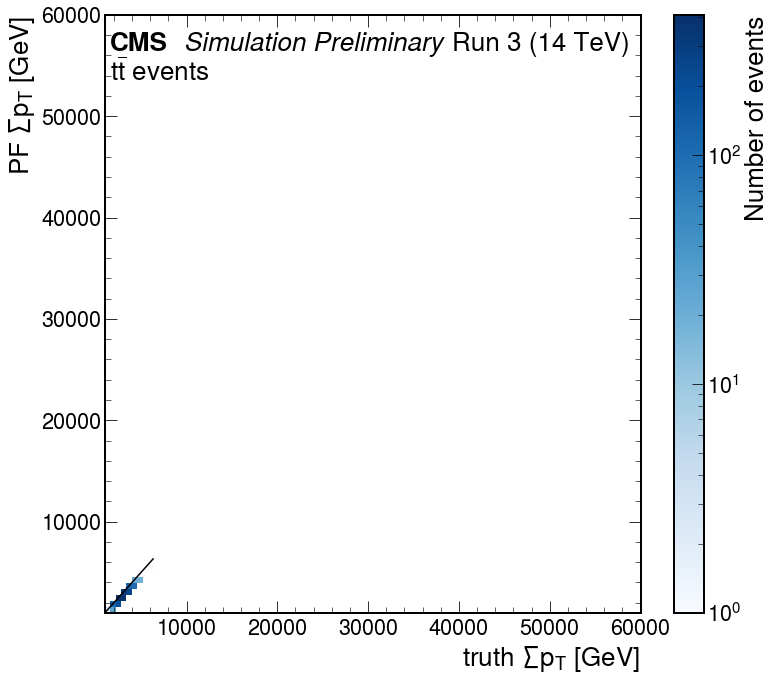

In [11]:
plt.figure(figsize=(12, 11))
ax = plt.axes()
e1 = awkward.sum(ycand_pt[(ycand_typ != 0) & (Xelem_typ != 2) & (Xelem_typ != 3)], axis=-1)
e2 = awkward.sum(ygen_pt[(ygen_typ != 0) & (Xelem_typ != 2) & (Xelem_typ != 3)], axis=-1)
plt.hist2d(
    e1,
    e2,
    bins=(np.linspace(1000, 60000, 100), np.linspace(1000, 60000, 100)),
    cmap="Blues",
    norm=matplotlib.colors.LogNorm(),
)
plt.xlabel("truth $\sum p_T$ [GeV]")
plt.ylabel("PF $\sum p_T$ [GeV]")
plt.colorbar(label="Number of events")
min_e = min(np.min(e1), np.min(e2))
max_e = max(np.max(e1), np.max(e2))
plt.plot([min_e, max_e], [min_e, max_e], color="black")
cms_label_sample_label(ax)
plt.savefig("{}_sumpt.pdf".format(sample), bbox_inches="tight")

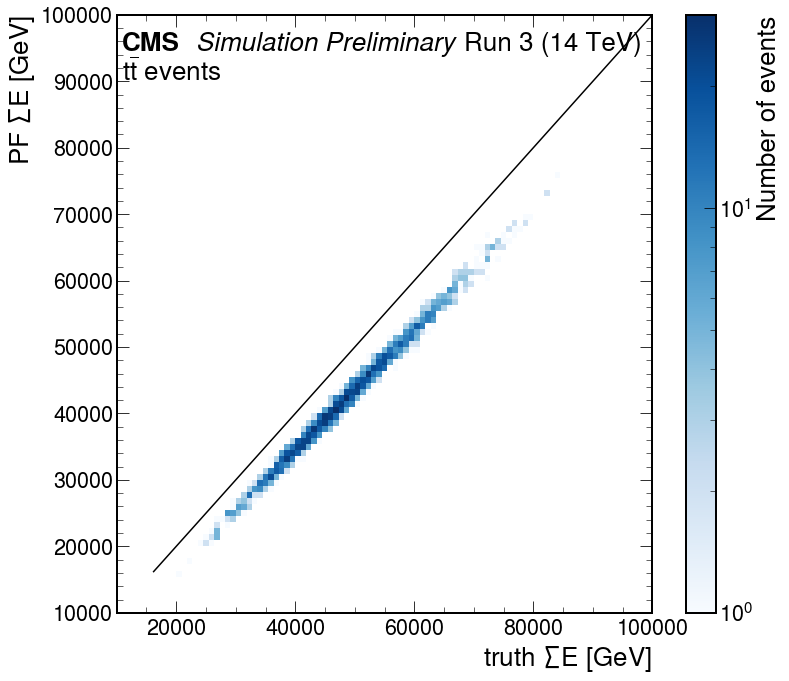

In [12]:
plt.figure(figsize=(12, 11))
ax = plt.axes()
e1 = awkward.sum(ycand_e[(ycand_typ != 0) & (Xelem_typ != 2) & (Xelem_typ != 3)], axis=-1)
e2 = awkward.sum(ygen_e[(ygen_typ != 0) & (Xelem_typ != 2) & (Xelem_typ != 3)], axis=-1)
plt.hist2d(
    e1, e2, bins=(np.linspace(1e4, 1e5, 100), np.linspace(1e4, 1e5, 100)), cmap="Blues", norm=matplotlib.colors.LogNorm()
)
plt.xlabel("truth $\sum E$ [GeV]")
plt.ylabel("PF $\sum E$ [GeV]")
plt.colorbar(label="Number of events")
min_e = min(np.min(e1), np.min(e2))
max_e = max(np.max(e1), np.max(e2))
plt.plot([min_e, max_e], [min_e, max_e], color="black")
cms_label_sample_label(ax)
plt.savefig("{}_sume.pdf".format(sample), bbox_inches="tight")

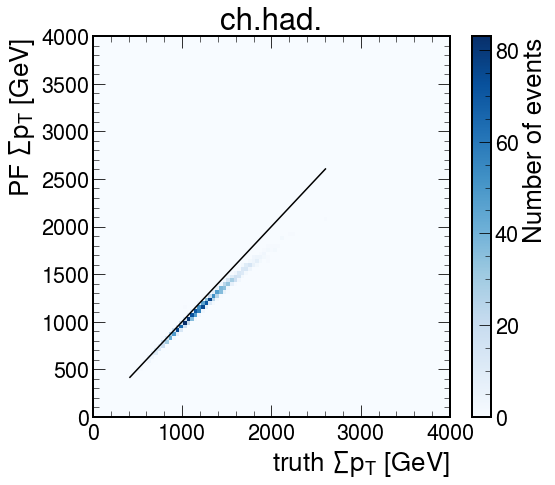

In [13]:
plt.figure(figsize=(8, 7))
e1 = awkward.sum(ycand_pt[ycand_typ == 211], axis=-1)
e2 = awkward.sum(ygen_pt[ygen_typ == 211], axis=-1)
plt.hist2d(
    e1,
    e2,
    bins=(np.linspace(0, 4000, 100), np.linspace(0, 4000, 100)),
    cmap="Blues",
    # norm=matplotlib.colors.LogNorm()
)
plt.xlabel("truth $\sum p_T$ [GeV]")
plt.ylabel("PF $\sum p_T$ [GeV]")
plt.colorbar(label="Number of events")
min_e = min(np.min(e1), np.min(e2))
max_e = max(np.max(e1), np.max(e2))
plt.plot([min_e, max_e], [min_e, max_e], color="black")
plt.title("ch.had.")
plt.savefig("{}_sumpt_211.pdf".format(sample))

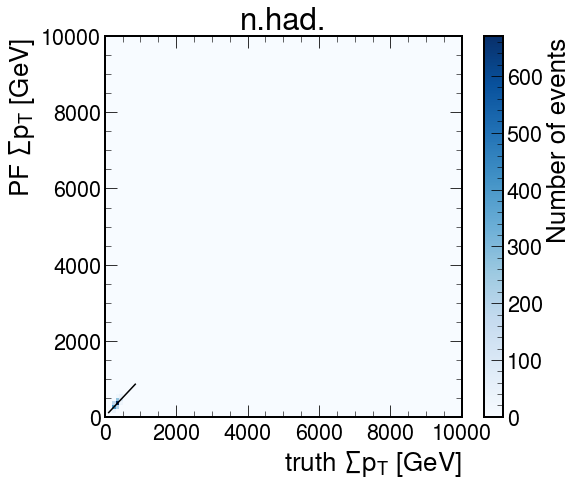

In [14]:
plt.figure(figsize=(8, 7))
e1 = awkward.sum(ycand_pt[ycand_typ == 130], axis=-1)
e2 = awkward.sum(ygen_pt[ygen_typ == 130], axis=-1)
plt.hist2d(
    e1,
    e2,
    bins=(np.linspace(0, 10000, 100), np.linspace(0, 10000, 100)),
    cmap="Blues",
    # norm=matplotlib.colors.LogNorm()
)
plt.xlabel("truth $\sum p_T$ [GeV]")
plt.ylabel("PF $\sum p_T$ [GeV]")
plt.colorbar(label="Number of events")
min_e = min(np.min(e1), np.min(e2))
max_e = max(np.max(e1), np.max(e2))
plt.plot([min_e, max_e], [min_e, max_e], color="black")
plt.title("n.had.")
plt.savefig("{}_sumpt_130.pdf".format(sample))

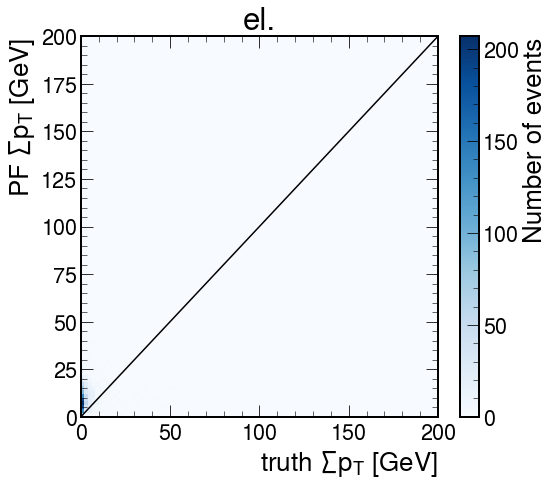

In [15]:
plt.figure(figsize=(8, 7))
e1 = awkward.sum(ycand_pt[ycand_typ == 11], axis=-1)
e2 = awkward.sum(ygen_pt[ygen_typ == 11], axis=-1)
plt.hist2d(
    e1,
    e2,
    bins=(np.linspace(0, 200, 100), np.linspace(0, 200, 100)),
    cmap="Blues",
    # norm=matplotlib.colors.LogNorm()
)
plt.xlabel("truth $\sum p_T$ [GeV]")
plt.ylabel("PF $\sum p_T$ [GeV]")
plt.colorbar(label="Number of events")
min_e = min(np.min(e1), np.min(e2))
max_e = max(np.max(e1), np.max(e2))
plt.plot([min_e, max_e], [min_e, max_e], color="black")
plt.title("el.")
plt.savefig("{}_sumpt_11.pdf".format(sample))

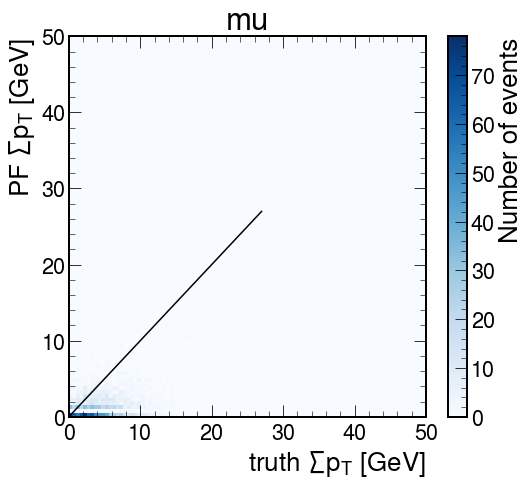

In [16]:
plt.figure(figsize=(8, 7))
e1 = awkward.sum(ycand_pt[ycand_typ == 13], axis=-1)
e2 = awkward.sum(ygen_pt[ygen_typ == 13], axis=-1)
plt.hist2d(
    e1,
    e2,
    bins=(np.linspace(0, 50, 100), np.linspace(0, 50, 100)),
    cmap="Blues",
    # norm=matplotlib.colors.LogNorm()
)
plt.xlabel("truth $\sum p_T$ [GeV]")
plt.ylabel("PF $\sum p_T$ [GeV]")
plt.colorbar(label="Number of events")
min_e = min(np.min(e1), np.min(e2))
max_e = max(np.max(e1), np.max(e2))
plt.plot([min_e, max_e], [min_e, max_e], color="black")
plt.title("mu")
plt.savefig("{}_sumpt_13.pdf".format(sample))

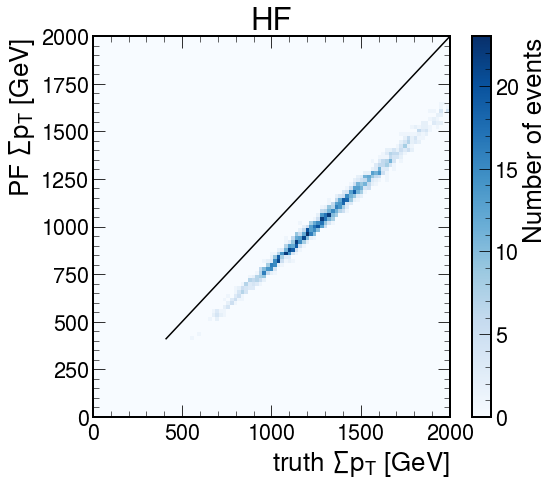

In [17]:
plt.figure(figsize=(8, 7))
e1 = awkward.sum(ycand_pt[(ycand_typ == 1) | (ycand_typ == 2)], axis=-1)
e2 = awkward.sum(ygen_pt[(ygen_typ == 1) | (ygen_typ == 2)], axis=-1)
plt.hist2d(
    e1,
    e2,
    bins=(np.linspace(0, 2000, 100), np.linspace(0, 2000, 100)),
    cmap="Blues",
    # norm=matplotlib.colors.LogNorm()
)
plt.xlabel("truth $\sum p_T$ [GeV]")
plt.ylabel("PF $\sum p_T$ [GeV]")
plt.colorbar(label="Number of events")
min_e = min(np.min(e1), np.min(e2))
max_e = max(np.max(e1), np.max(e2))
plt.plot([min_e, max_e], [min_e, max_e], color="black")
plt.title("HF")
plt.savefig("{}_sumpt_1.pdf".format(sample))

211.0 2288207.5697446875
130.0 689022.154382477
22.0 311909.9523592703
13.0 2911.6548248529434
11.0 21109.78729736805
2.0 911918.5163761312
1.0 1197027.9857861032


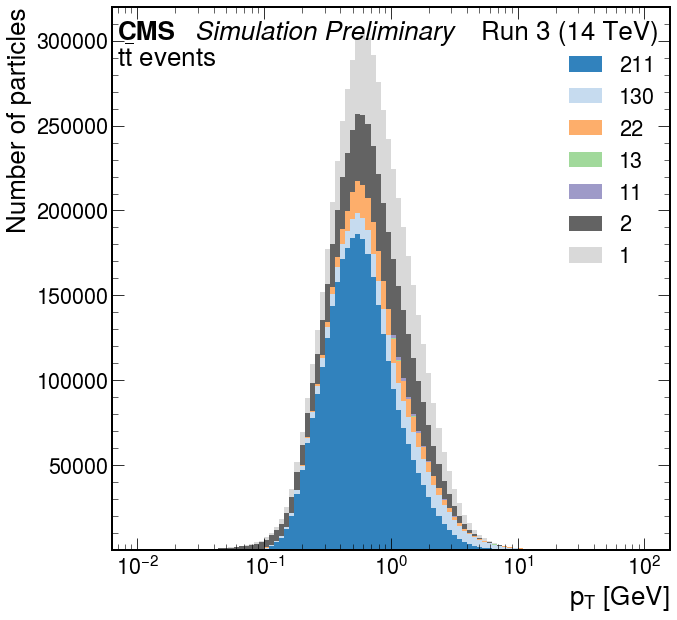

In [18]:
ax = plt.axes()
b = np.logspace(-2, 2, 101)
hs = []
pids = sorted(np.unique(awkward.flatten(ygen_typ[ygen_typ != 0])).tolist())
colors = plt.cm.get_cmap("tab20c", len(pids))
labels = []
for pid in pids[::-1]:
    energy_pid = awkward.flatten(ygen_pt[(ygen_typ == pid)])
    print(pid, np.sum(energy_pid))
    hs.append(np.histogram(energy_pid, bins=b))
    labels.append(int(pid))
mplhep.histplot(hs, stack=True, histtype="fill", label=labels, color=colors.colors)
# plt.yscale("log")
plt.xscale("log")
plt.legend(ncol=1, loc=(0.8, 0.5))
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Number of particles")
# plt.title("{}\nMLPF truth".format(sample))
cms_label_sample_label(ax)
plt.savefig("{}_truth_pt.pdf".format(sample))

211.0 5146.773010817569
130.0 3045.605035710674
22.0 5779.24573237261
13.0 56.60238531045616
11.0 97.40463518624892
2.0 80.46045338362455
1.0 3730.0819506645203


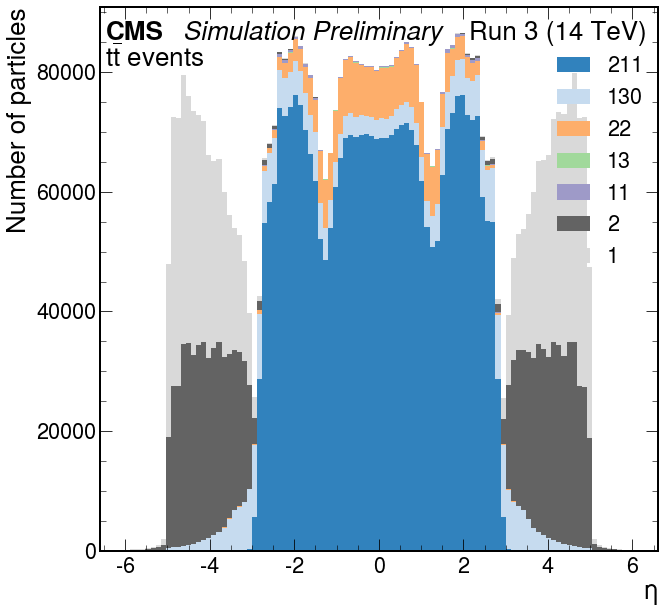

In [19]:
b = np.linspace(-6, 6, 101)
ax = plt.axes()
hs = []
pids = sorted(np.unique(awkward.flatten(ygen_typ[ygen_typ != 0])).tolist())
colors = plt.cm.get_cmap("tab20c", len(pids))
labels = []
for pid in pids[::-1]:
    energy_pid = awkward.flatten(ygen_eta[(ygen_typ == pid)])
    print(pid, np.sum(energy_pid))
    hs.append(np.histogram(energy_pid, bins=b))
    labels.append(int(pid))
mplhep.histplot(hs, stack=True, histtype="fill", label=labels, color=colors.colors)
# plt.yscale("log")
# plt.xscale("log")
plt.legend(ncol=1, loc=(0.8, 0.5))
plt.xlabel("$\eta$")
plt.ylabel("Number of particles")
# plt.title("{}\nMLPF truth".format(sample))
cms_label_sample_label(ax)
plt.savefig("{}_truth_eta.pdf".format(sample))

211.0 2430341.714793488
130.0 656993.4703942277
22.0 287385.09939597175
13.0 9283.862524420023
11.0 7149.290865778923
2.0 184704.30979701318
1.0 2435056.4171106443


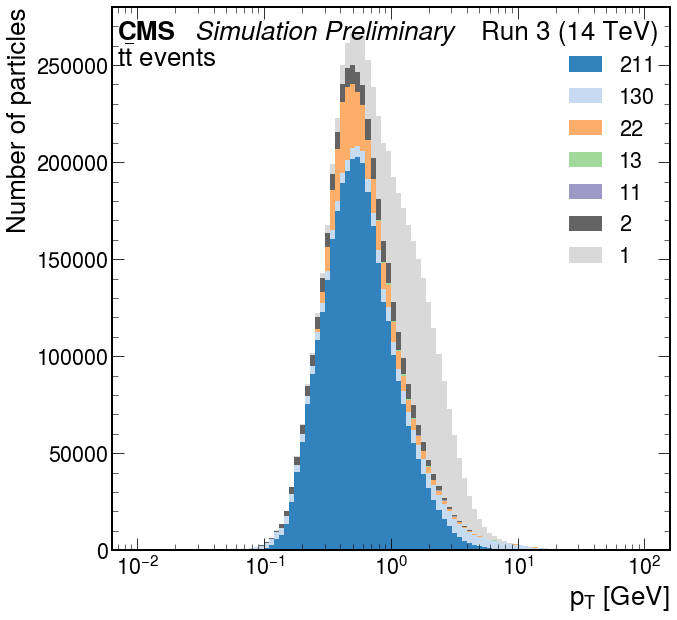

In [20]:
ax = plt.axes()
b = np.logspace(-2, 2, 101)
hs = []
pids = sorted(np.unique(awkward.flatten(ycand_typ[ycand_typ != 0])).tolist())
colors = plt.cm.get_cmap("tab20c", len(pids))
labels = []
for pid in pids[::-1]:
    energy_pid = awkward.flatten(ycand_pt[(ycand_typ == pid)])
    print(pid, np.sum(energy_pid))
    hs.append(np.histogram(energy_pid, bins=b))
    labels.append(int(pid))
mplhep.histplot(hs, stack=True, histtype="fill", label=labels, color=colors.colors)
# plt.yscale("log")
plt.xscale("log")
plt.legend(ncol=1, loc=(0.8, 0.5))
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Number of particles")
# plt.title("{}\nPF".format(sample))
cms_label_sample_label(ax)
plt.savefig("{}_pf_pt.pdf".format(sample))

211.0 -753.9811290066777
130.0 -95.59712757303305
22.0 8027.804981315157
13.0 247.47495867032558
11.0 94.7737920426298
2.0 -904.3217437267303
1.0 2004.910408258438


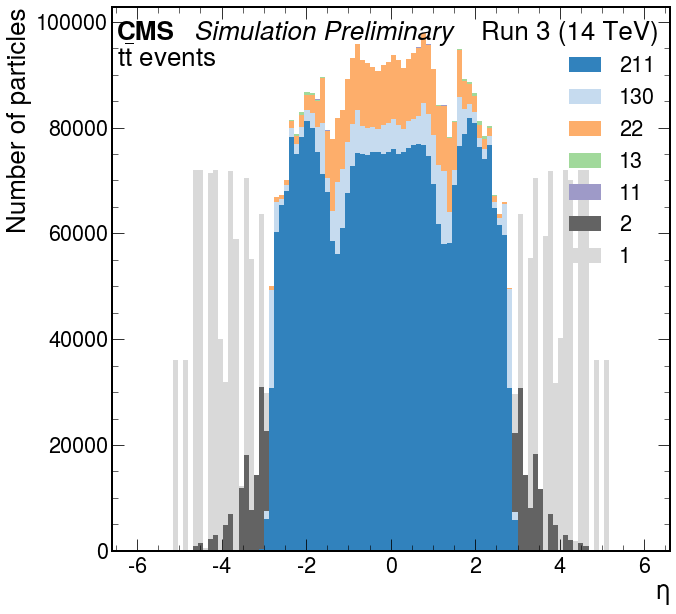

In [21]:
ax = plt.axes()
b = np.linspace(-6, 6, 101)
hs = []
pids = sorted(np.unique(awkward.flatten(ycand_typ[ycand_typ != 0])).tolist())
colors = plt.cm.get_cmap("tab20c", len(pids))
labels = []
for pid in pids[::-1]:
    energy_pid = awkward.flatten(ycand_eta[(ycand_typ == pid)])
    print(pid, np.sum(energy_pid))
    hs.append(np.histogram(energy_pid, bins=b))
    labels.append(int(pid))
mplhep.histplot(hs, stack=True, histtype="fill", label=labels, color=colors.colors)
# plt.yscale("log")
# plt.xscale("log")
plt.legend(ncol=1, loc=(0.8, 0.5))
plt.xlabel("$\eta$")
plt.ylabel("Number of particles")
# plt.title("{}\nPF".format(sample))
cms_label_sample_label(ax)
plt.savefig("{}_pf_eta.pdf".format(sample))

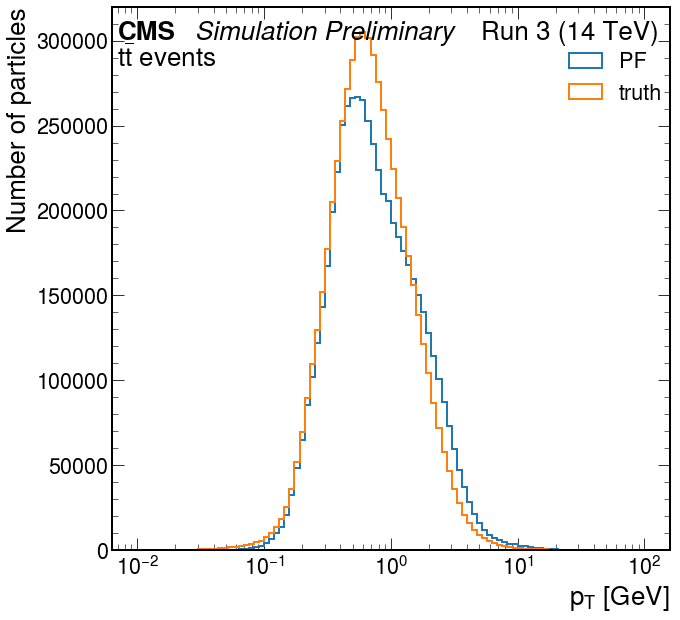

In [22]:
ax = plt.axes()
b = np.logspace(-2, 2, 101)
h0 = plt.hist(awkward.flatten(ycand_pt[ycand_typ != 0]), bins=b, histtype="step", lw=2, label="PF")
h1 = plt.hist(awkward.flatten(ygen_pt[ygen_typ != 0]), bins=b, histtype="step", lw=2, label="truth")
plt.xscale("log")
# plt.yscale("log")
plt.legend(ncol=1, loc=(0.8, 0.8))
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Number of particles")
cms_label_sample_label(ax)
plt.savefig("{}_pf_vs_truth_pt.pdf".format(sample))

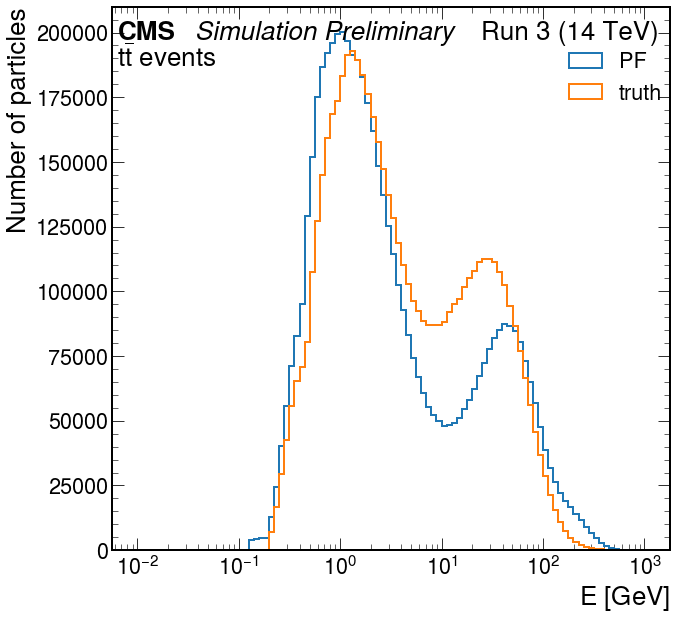

In [23]:
ax = plt.axes()
b = np.logspace(-2, 3, 101)
h0 = plt.hist(awkward.flatten(ycand_e[ycand_typ != 0]), bins=b, histtype="step", lw=2, label="PF")
h1 = plt.hist(awkward.flatten(ygen_e[ygen_typ != 0]), bins=b, histtype="step", lw=2, label="truth")
plt.xscale("log")
# plt.yscale("log")
plt.legend(ncol=1, loc=(0.8, 0.8))
plt.xlabel("$E$ [GeV]")
plt.ylabel("Number of particles")
cms_label_sample_label(ax)
plt.savefig("{}_pf_vs_truth_e.pdf".format(sample))

<ipython-input-24-29f0140c2d2f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


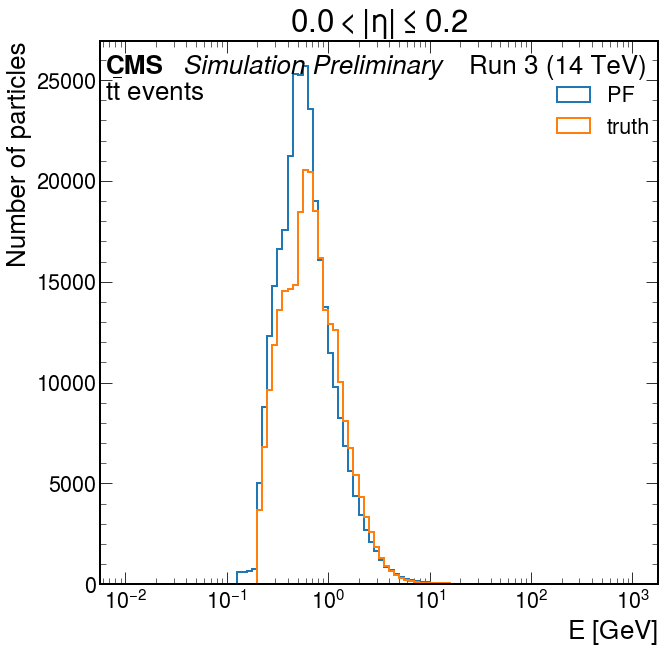

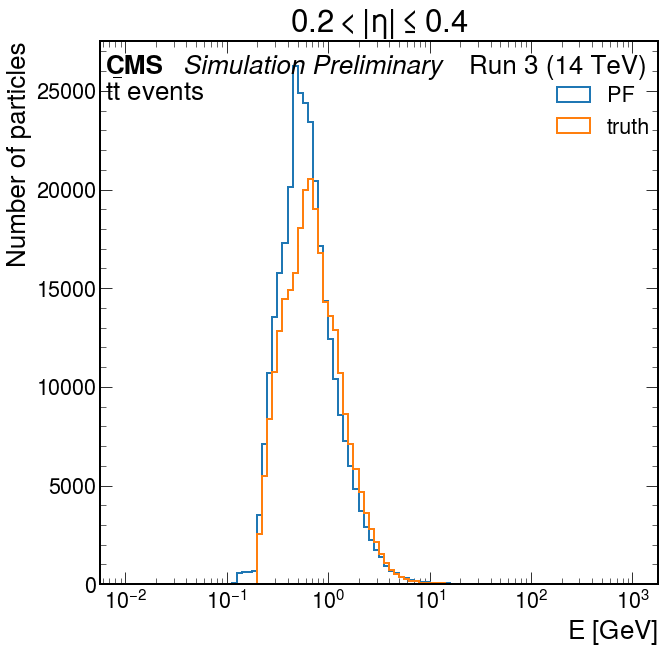

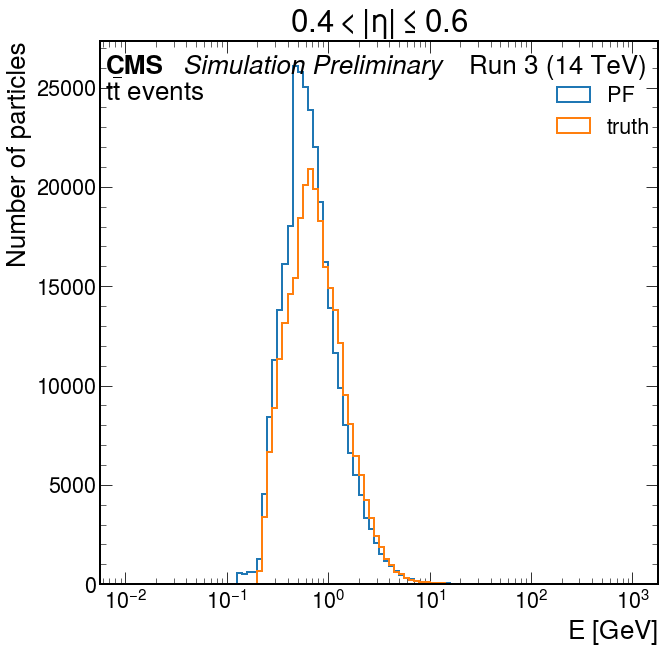

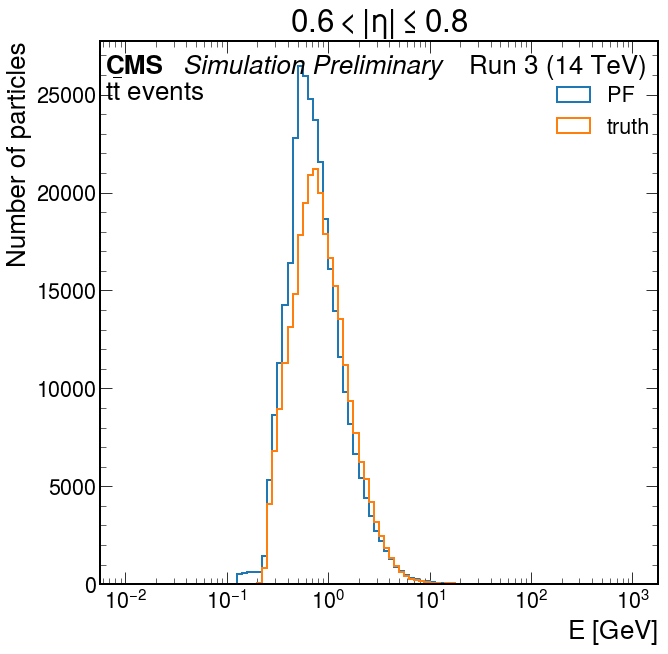

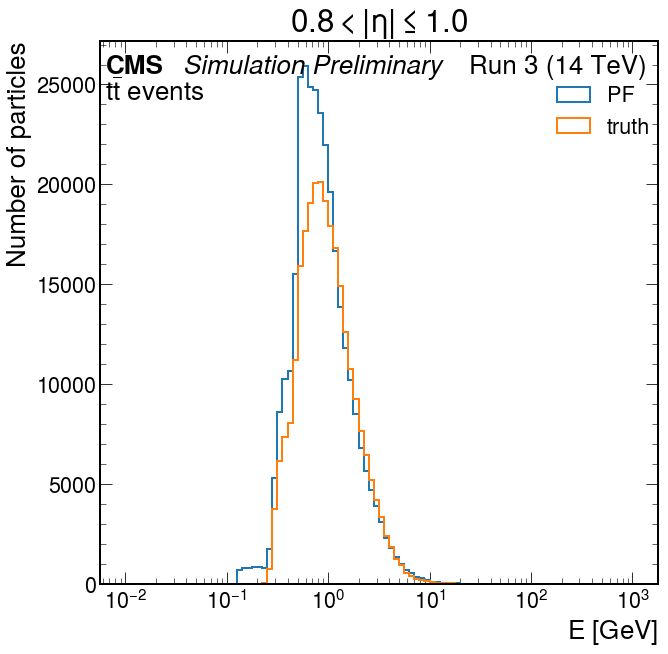

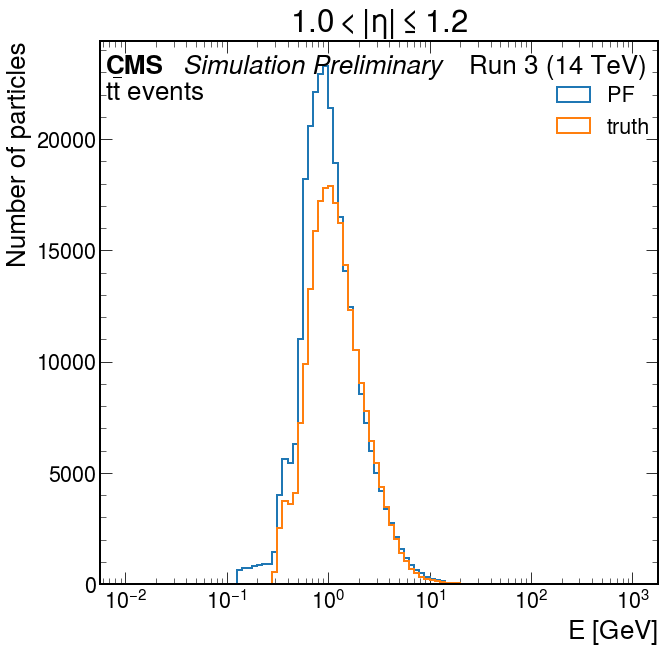

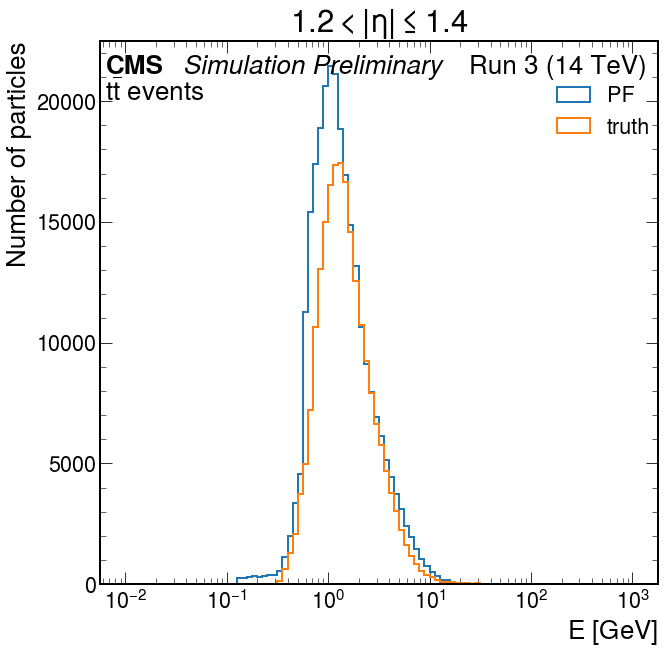

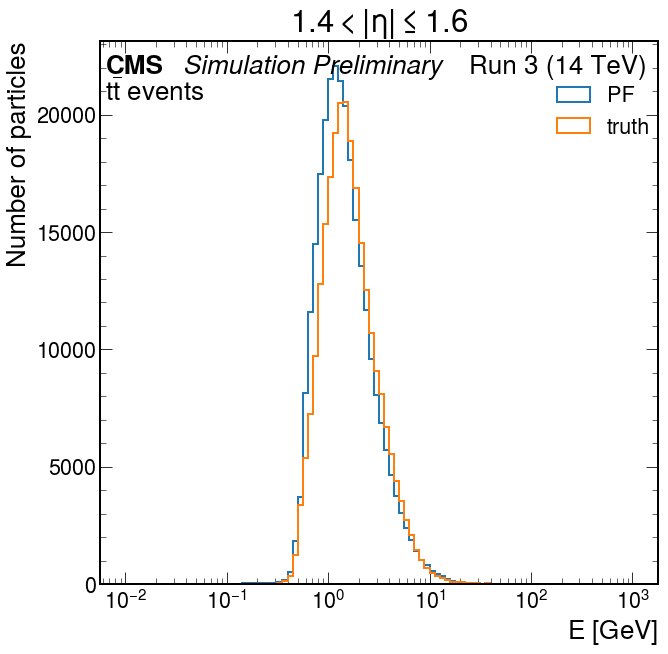

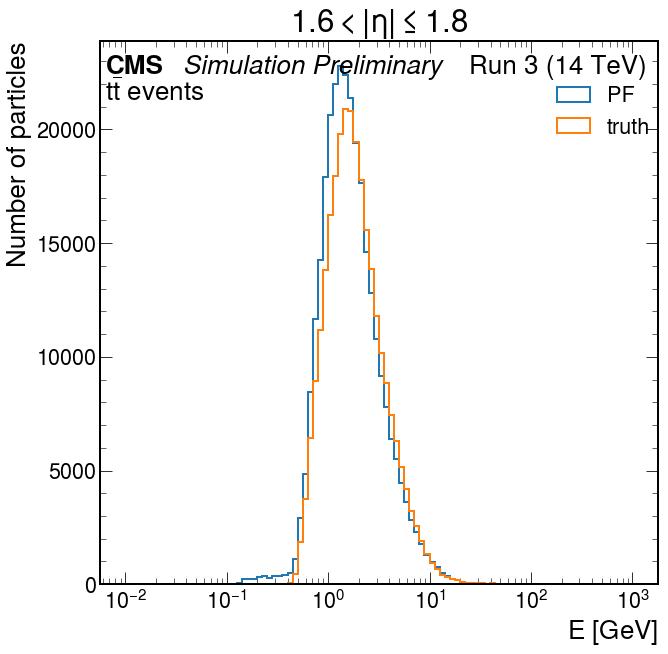

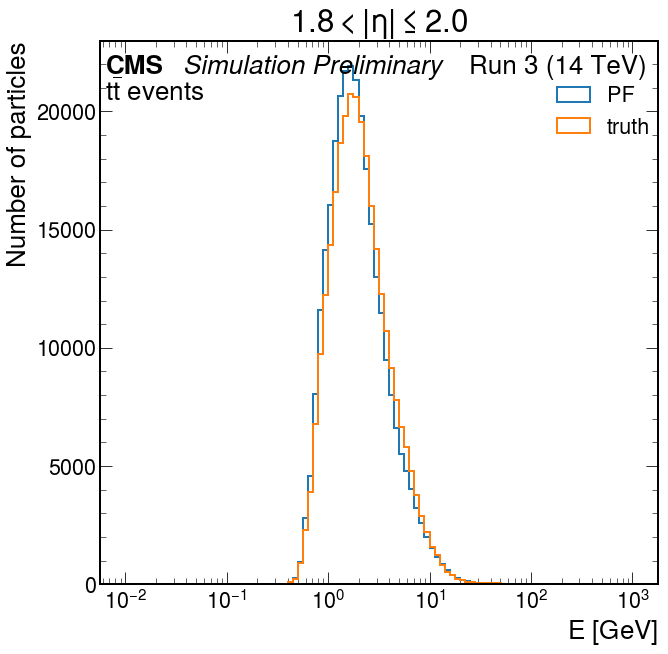

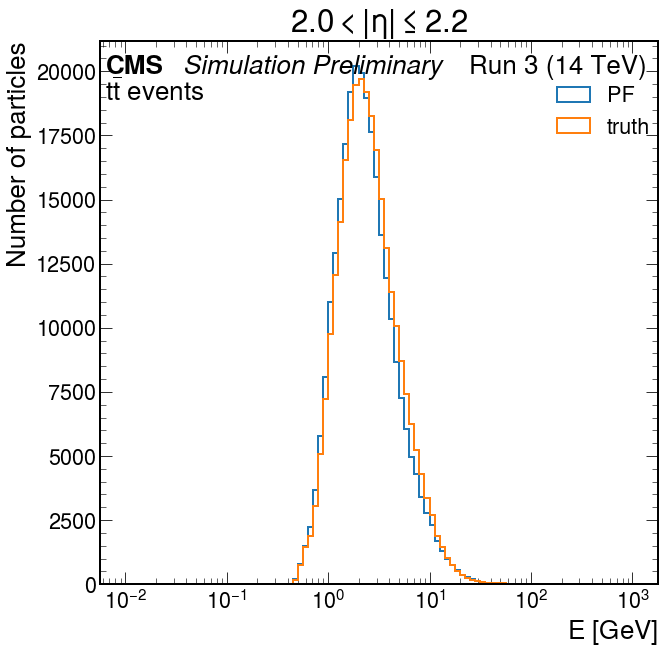

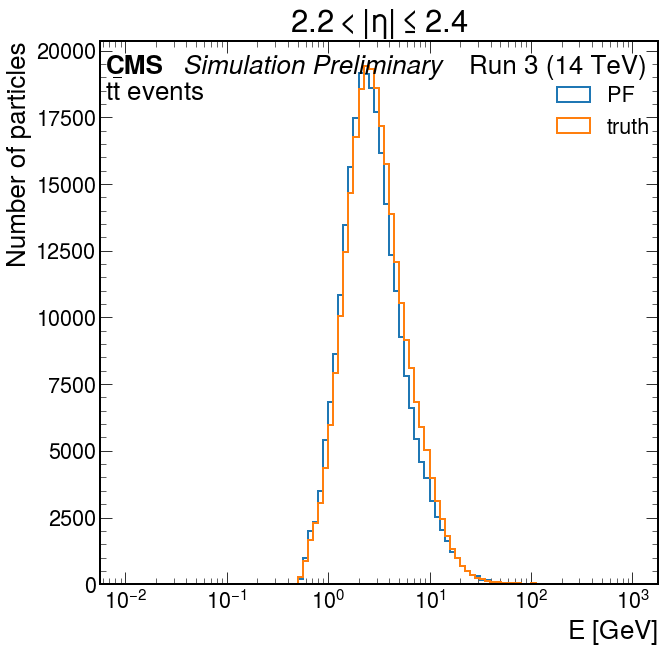

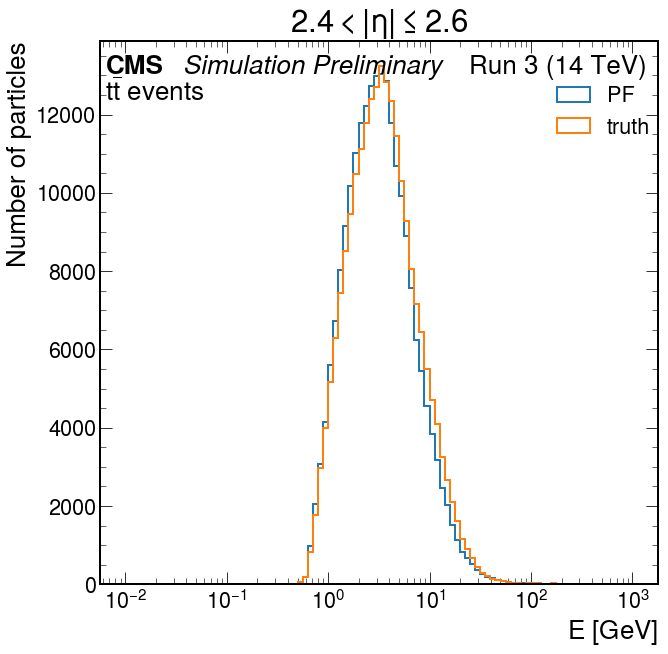

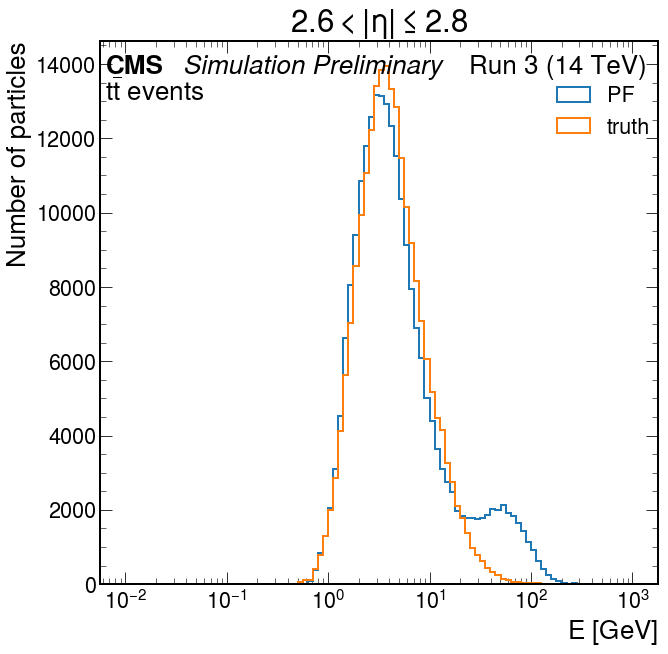

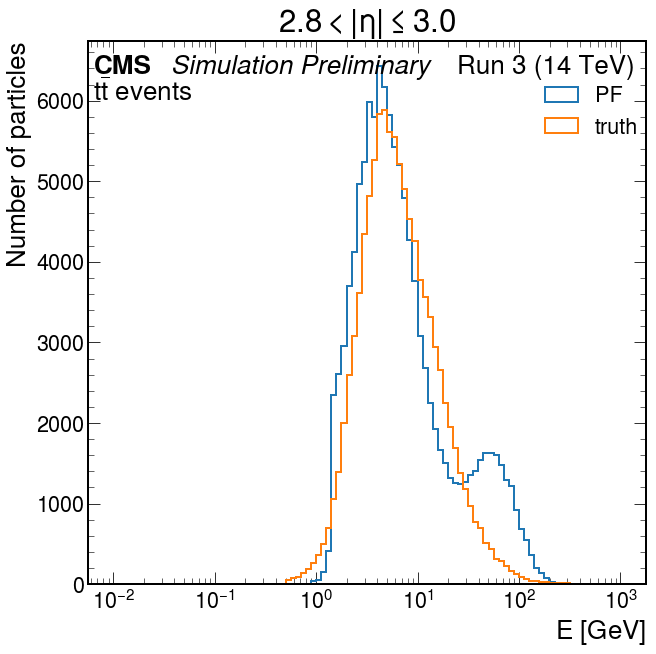

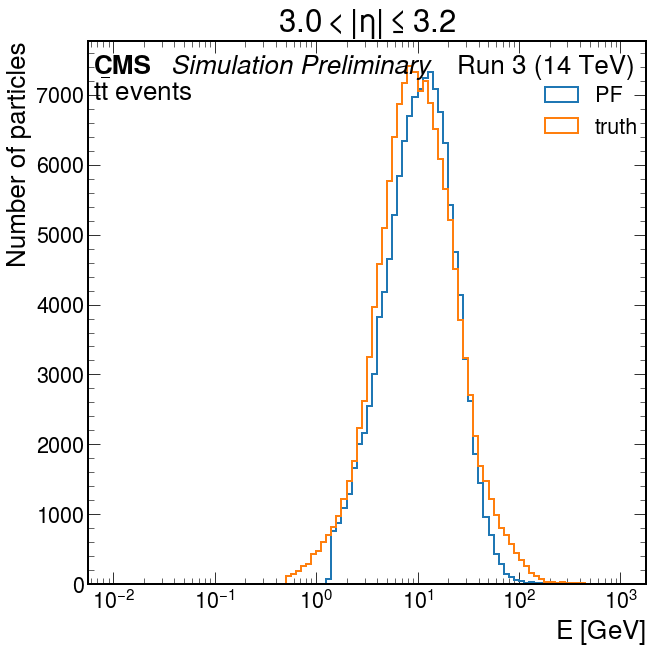

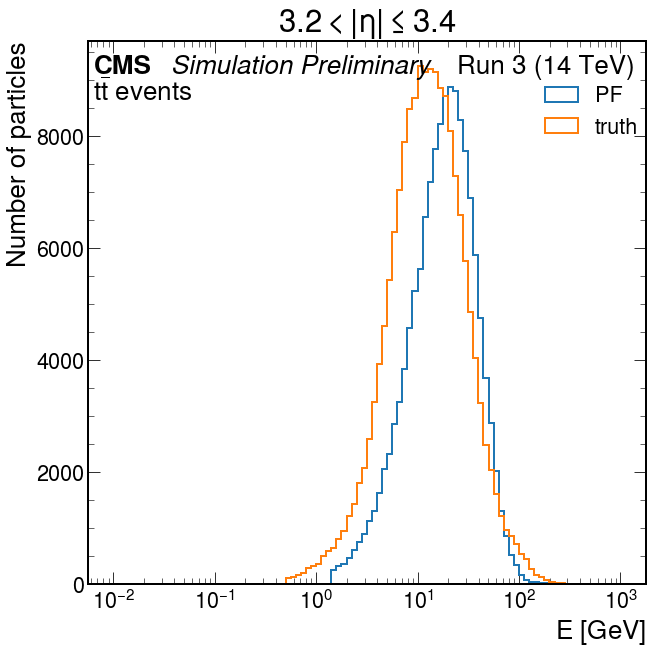

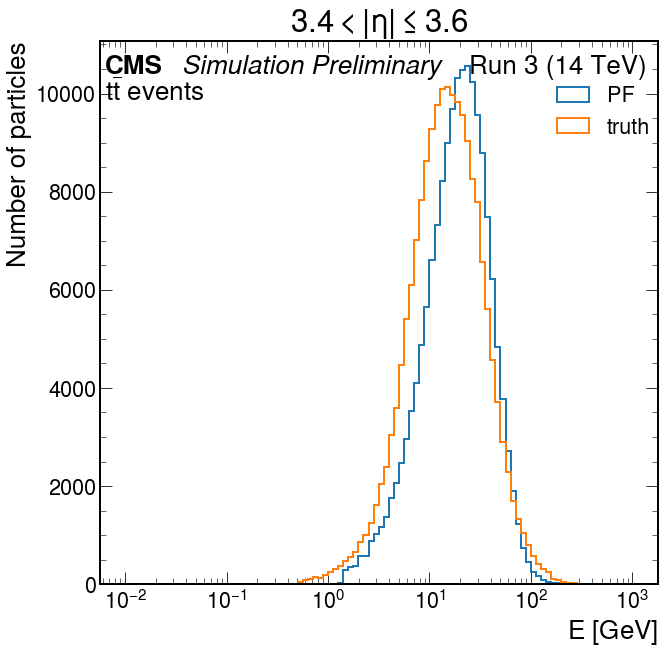

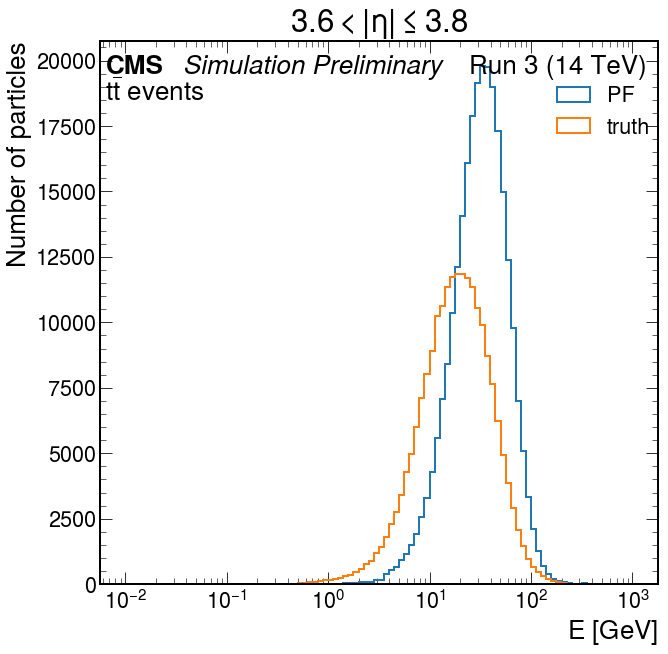

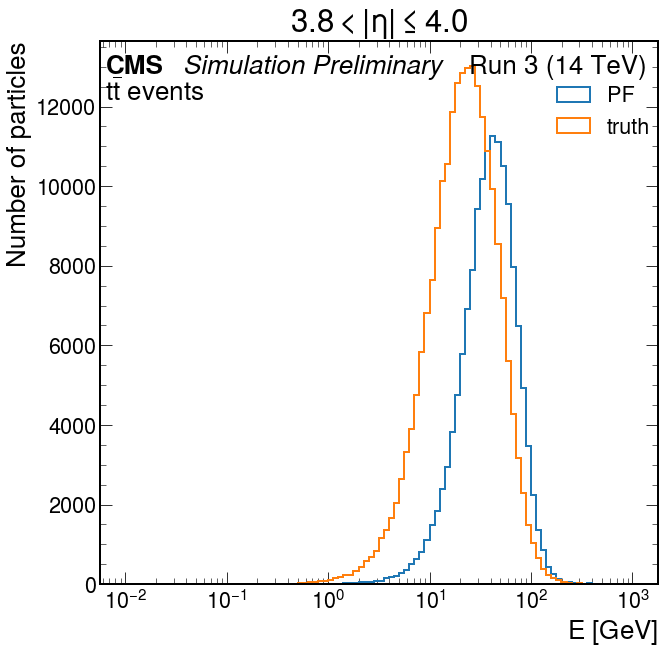

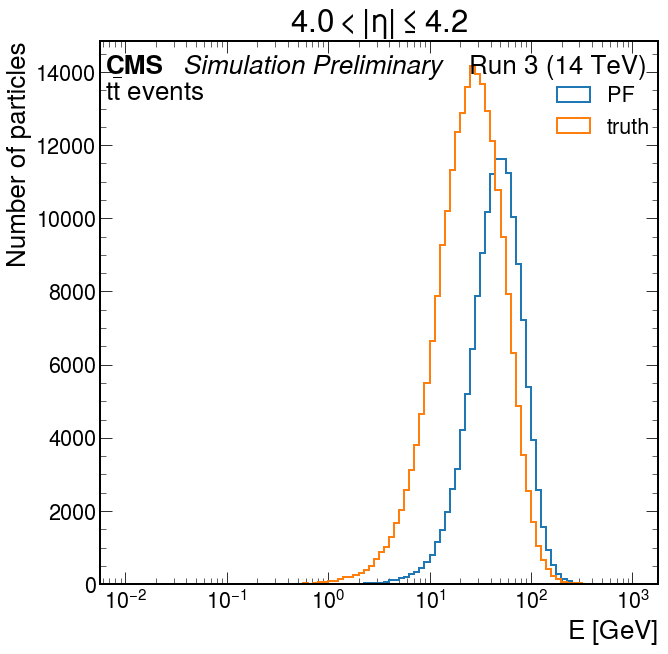

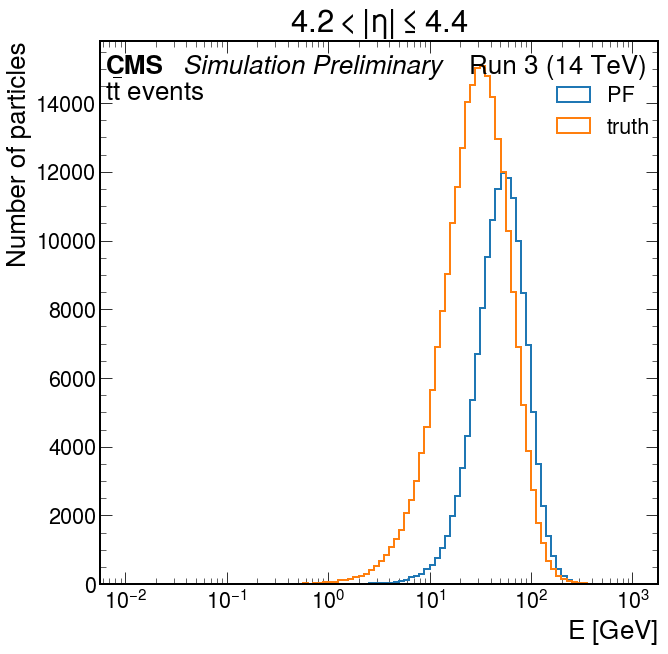

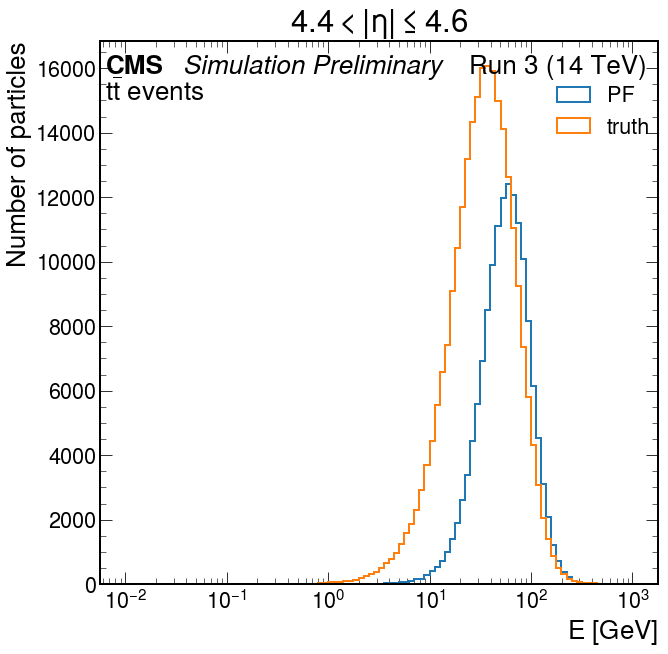

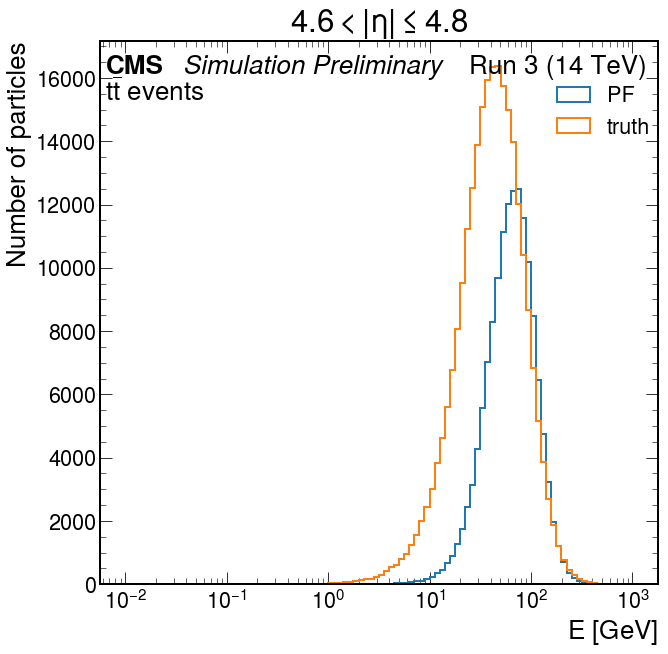

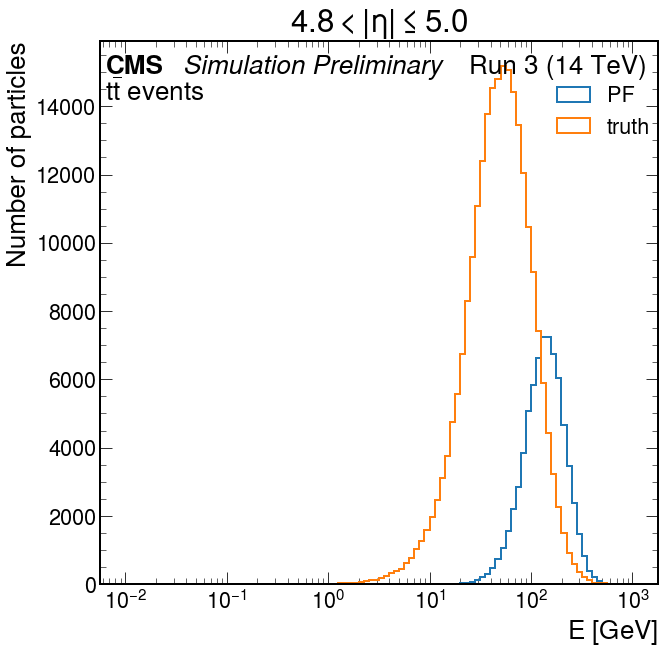

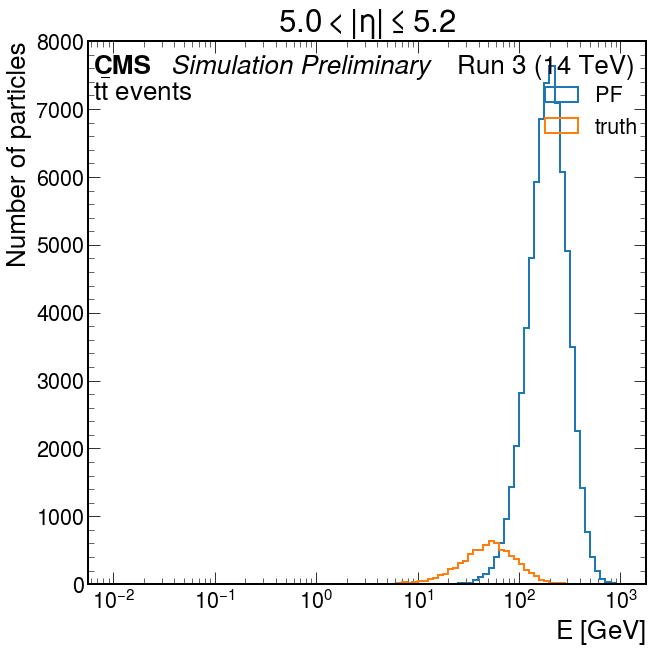

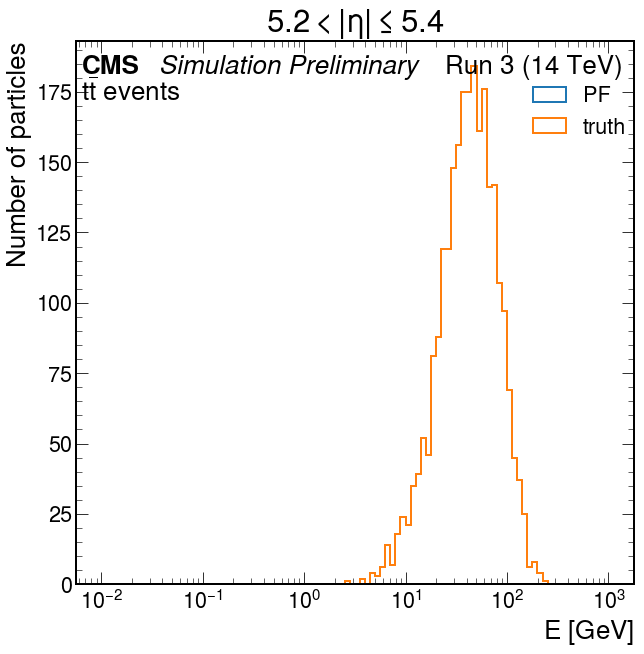

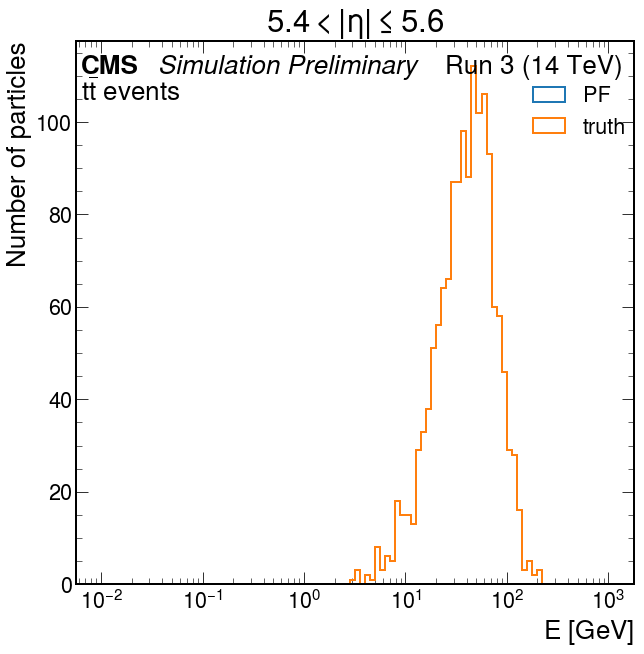

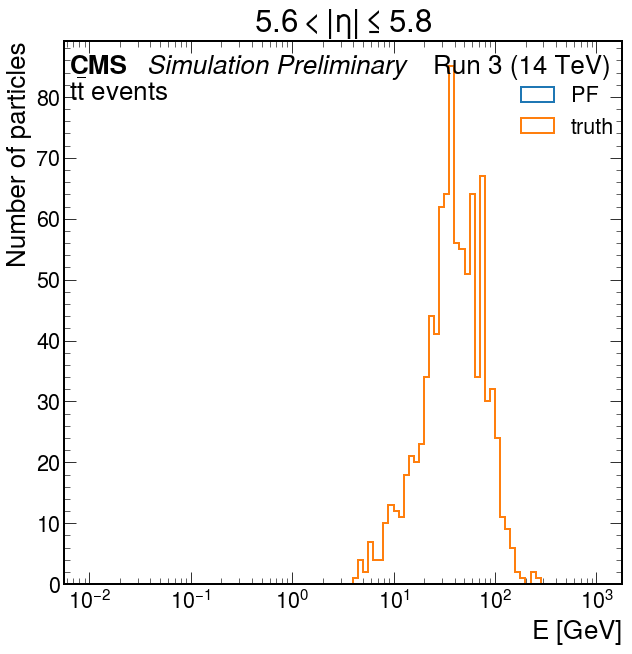

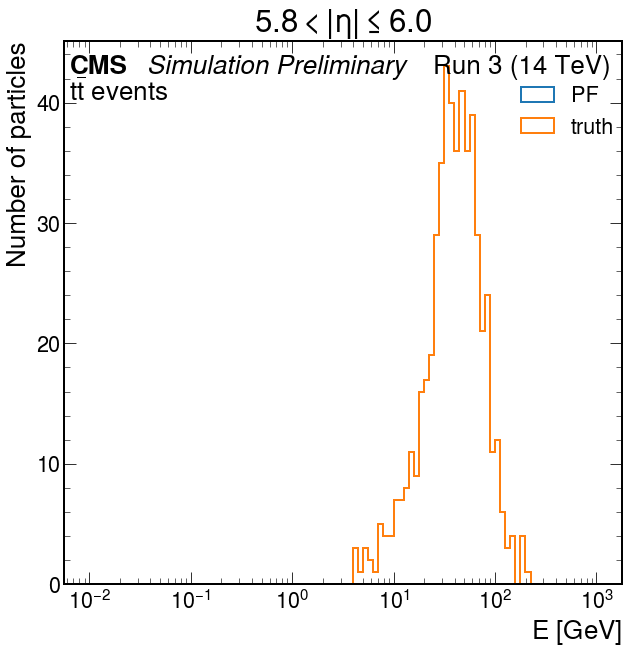

In [24]:
b = np.logspace(-2, 3, 101)
for etabin in np.arange(0.0, 6.0, 0.2):
    plt.figure()
    ax = plt.axes()
    h0 = plt.hist(
        awkward.flatten(ycand_e[(ycand_typ != 0) & (np.abs(ycand_eta) > etabin) & (np.abs(ycand_eta) <= etabin + 0.2)]),
        bins=b,
        histtype="step",
        lw=2,
        label="PF",
    )
    h1 = plt.hist(
        awkward.flatten(ygen_e[(ygen_typ != 0) & (np.abs(ygen_eta) > etabin) & (np.abs(ygen_eta) <= etabin + 0.2)]),
        bins=b,
        histtype="step",
        lw=2,
        label="truth",
    )
    plt.xscale("log")
    # plt.yscale("log")
    plt.legend(ncol=1, loc=(0.8, 0.8))
    plt.xlabel("$E$ [GeV]")
    plt.ylabel("Number of particles")
    cms_label_sample_label(ax)
    plt.title("${:.1f} < |\eta| \leq {:.1f}$".format(etabin, etabin + 0.2))
    # plt.savefig("{}_pf_vs_truth_e.pdf".format(sample))

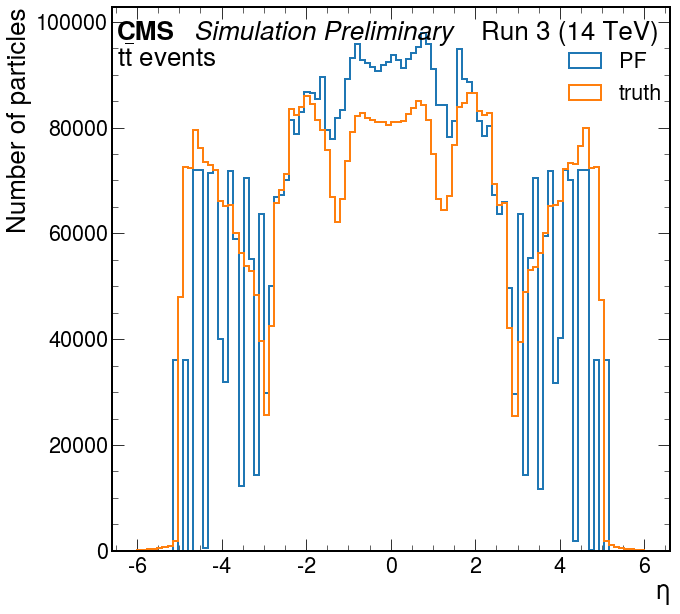

In [25]:
ax = plt.axes()
b = np.linspace(-6, 6, 101)
h0 = plt.hist(awkward.flatten(ycand_eta[ycand_typ != 0]), bins=b, histtype="step", lw=2, label="PF")
h1 = plt.hist(awkward.flatten(ygen_eta[ygen_typ != 0]), bins=b, histtype="step", lw=2, label="truth")
# plt.yscale("log")
plt.legend(ncol=1, loc=(0.8, 0.8))
plt.xlabel("$\eta$")
plt.ylabel("Number of particles")
cms_label_sample_label(ax)
plt.savefig("{}_pf_vs_truth_eta.pdf".format(sample))

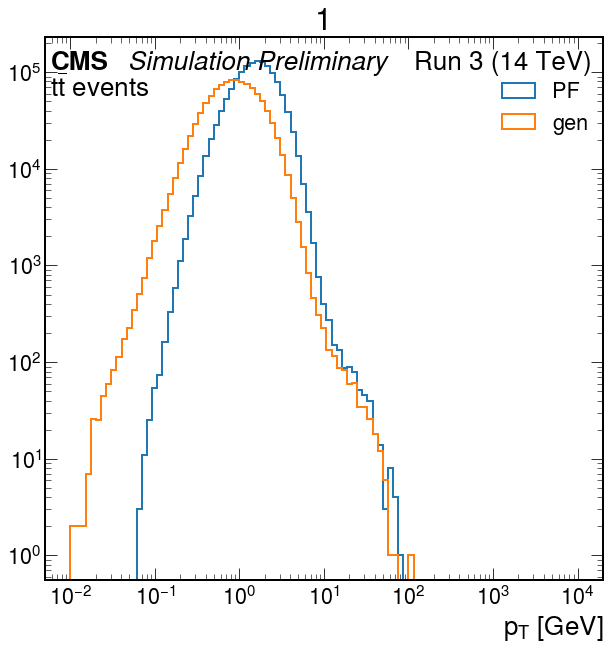

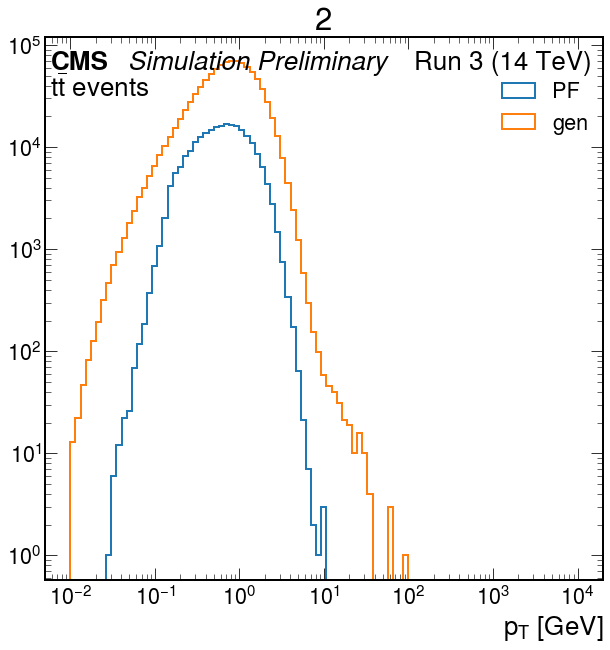

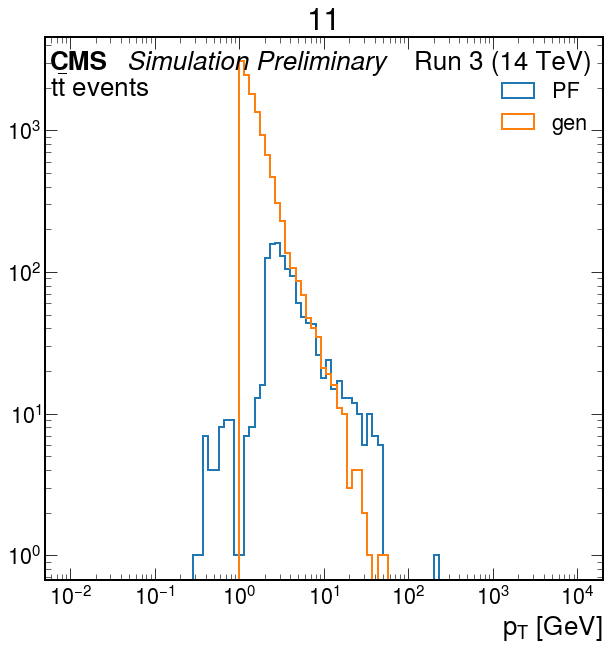

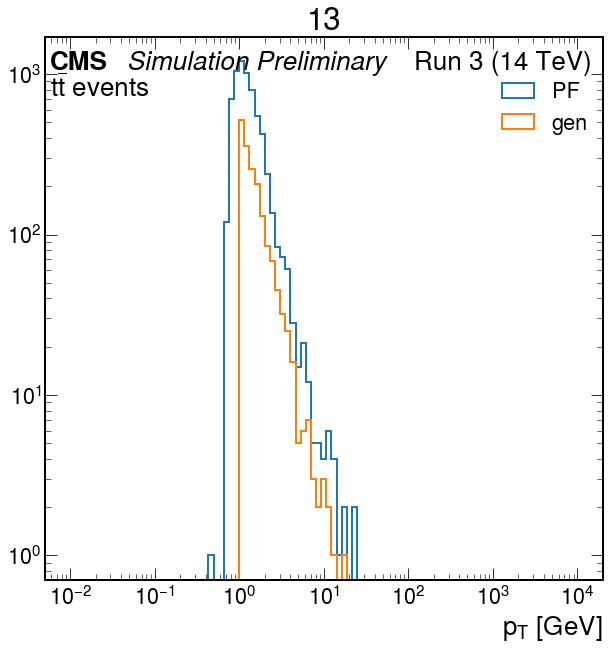

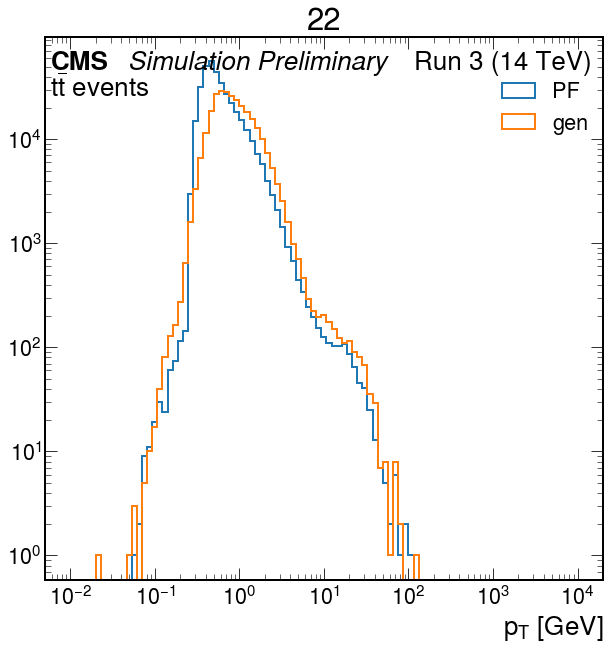

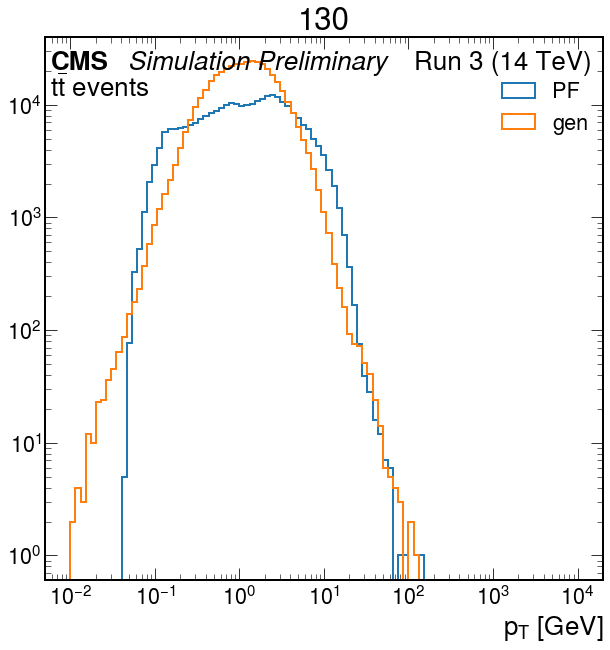

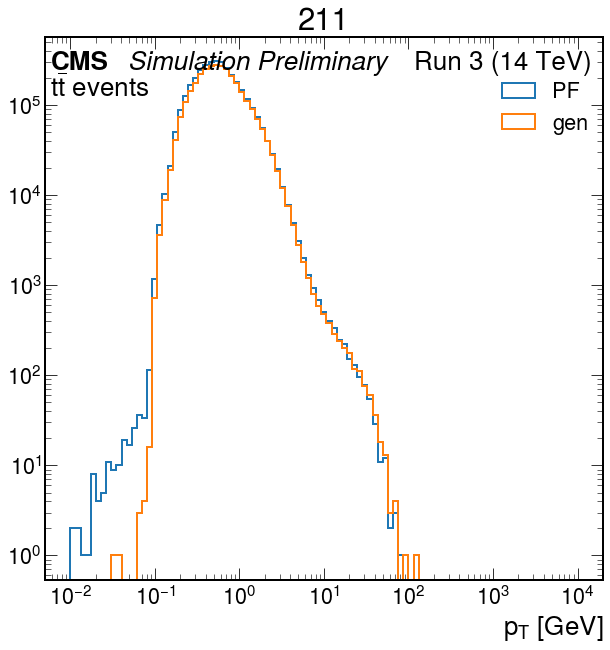

In [26]:
b = np.logspace(-2, 4, 100)
for pid in [1, 2, 11, 13, 22, 130, 211]:
    plt.figure()
    ax = plt.axes()
    plt.hist(awkward.flatten(ycand_pt[ycand_typ == pid]), bins=b, histtype="step", lw=2, label="PF")
    plt.hist(awkward.flatten(ygen_pt[ygen_typ == pid]), bins=b, histtype="step", lw=2, label="gen")
    plt.yscale("log")
    plt.xscale("log")
    plt.title(pid)
    plt.legend(ncol=1, loc=(0.8, 0.8))
    plt.xlabel("$p_T$ [GeV]")
    cms_label_sample_label(ax)
    plt.savefig("{}_pid{}_pt.pdf".format(sample, pid), bbox_inches="tight")

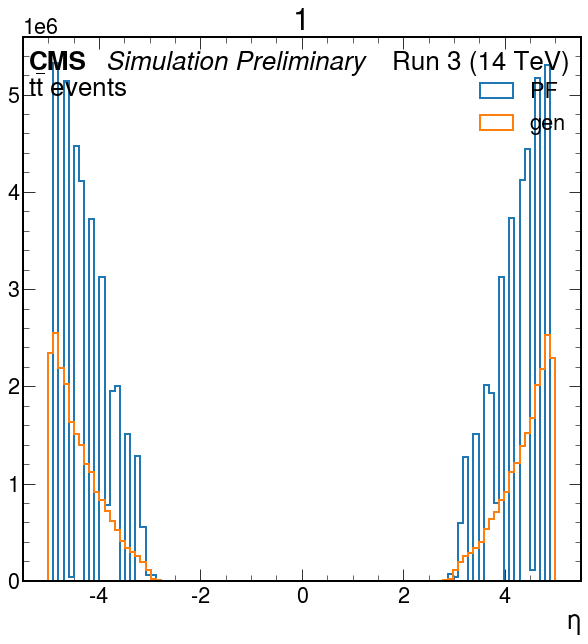

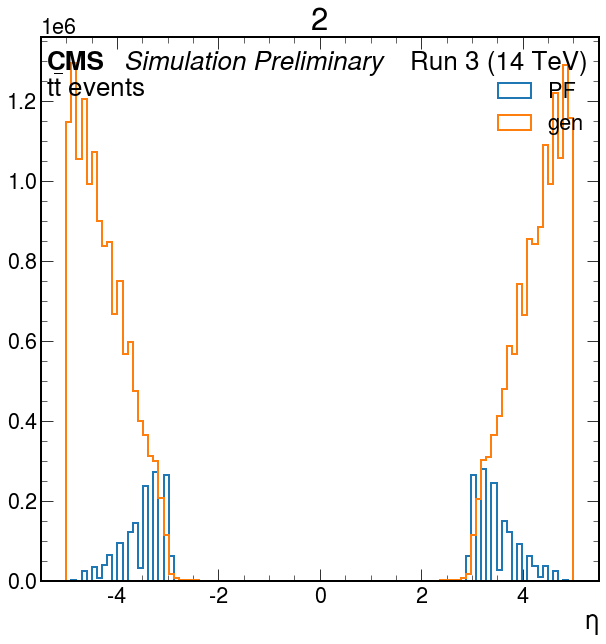

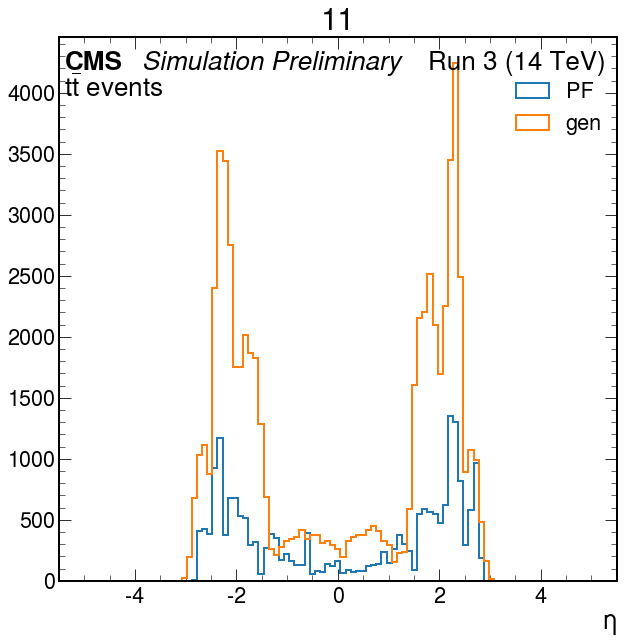

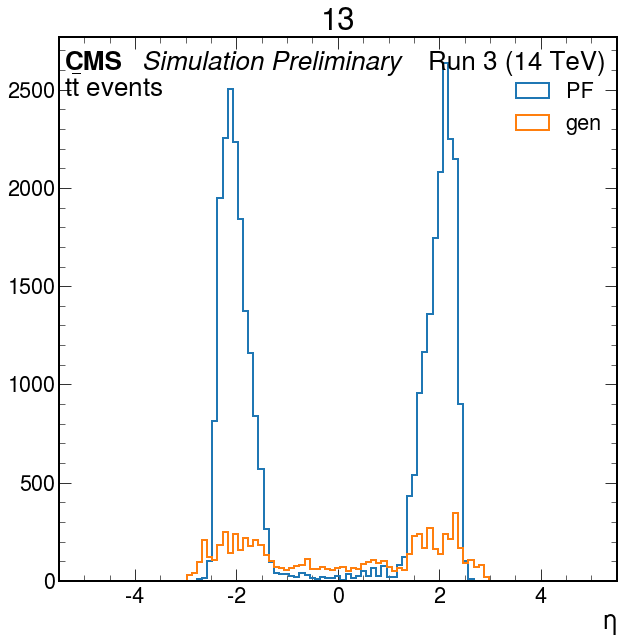

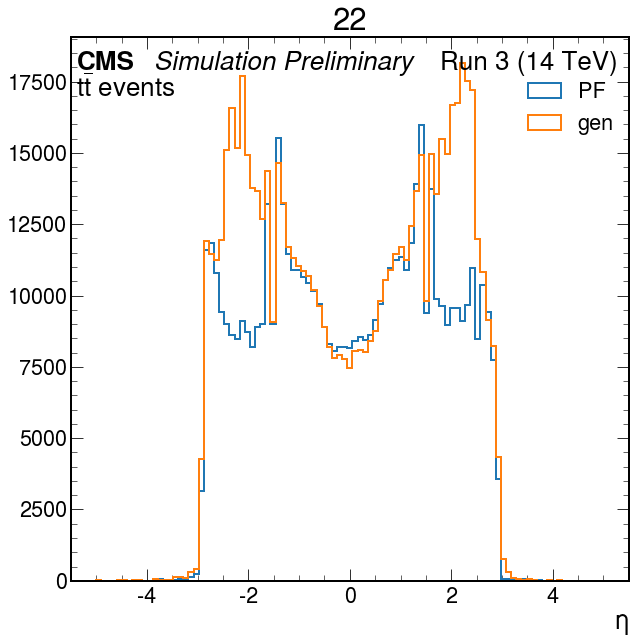

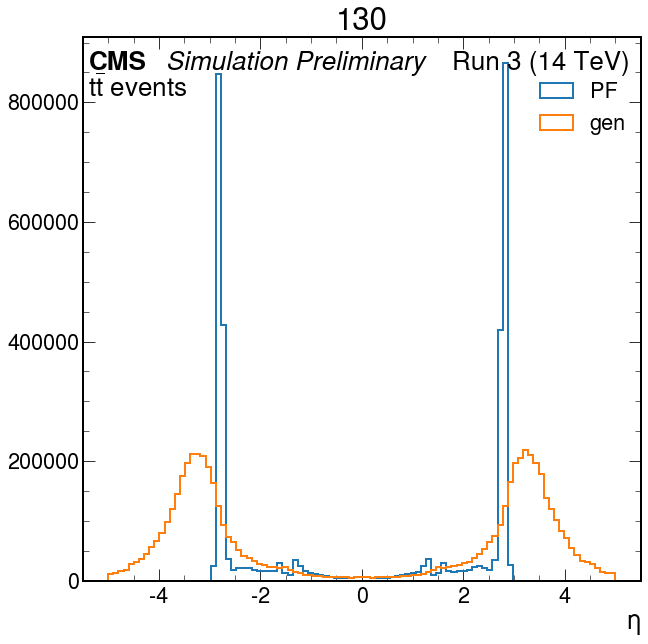

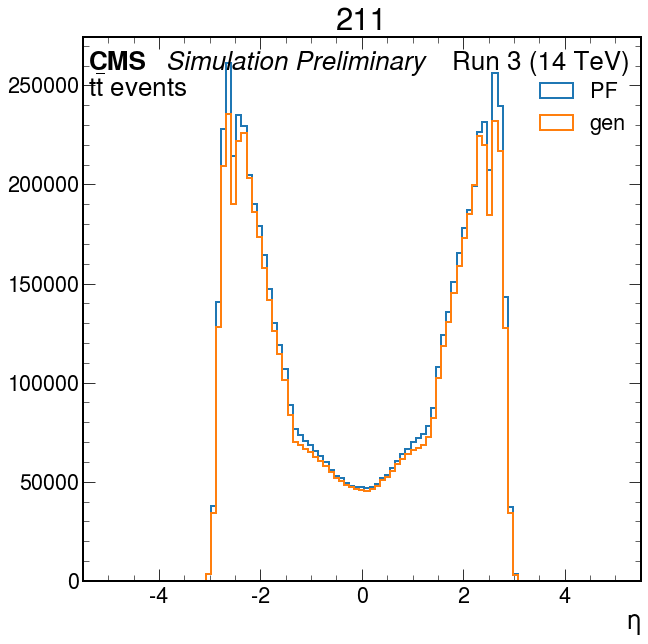

In [27]:
b = np.linspace(-5, 5, 100)
for pid in [1, 2, 11, 13, 22, 130, 211]:
    plt.figure()
    ax = plt.axes()
    plt.hist(
        awkward.flatten(ycand_eta[ycand_typ == pid]),
        weights=awkward.flatten(ycand_e[ycand_typ == pid]),
        bins=b,
        histtype="step",
        lw=2,
        label="PF",
    )
    plt.hist(
        awkward.flatten(ygen_eta[ygen_typ == pid]),
        weights=awkward.flatten(ygen_e[ygen_typ == pid]),
        bins=b,
        histtype="step",
        lw=2,
        label="gen",
    )
    plt.title(pid)
    plt.legend(ncol=1, loc=(0.8, 0.8))
    cms_label_sample_label(ax)
    plt.xlabel("$\eta$")
    plt.savefig("{}_pid{}_eta.pdf".format(sample, pid), bbox_inches="tight")

In [28]:
# plt.figure(figsize=(10,5))
# bins = np.linspace(0,5,201)

# gen_pt = awkward.flatten(ygen_pt[(ygen_typ==211) & (ycand_typ!=0)])
# cand_pt = awkward.flatten(ycand_pt[(ygen_typ==211) & (ycand_typ!=0)])
# plt.hist(gen_pt/cand_pt, bins=bins, histtype="step", lw=2, label="ch.had");

# gen_pt = awkward.flatten(ygen_pt[(ygen_typ==130) & (ycand_typ!=0)])
# cand_pt = awkward.flatten(ycand_pt[(ygen_typ==130) & (ycand_typ!=0)])
# plt.hist(gen_pt/cand_pt, bins=bins, histtype="step", lw=2, label="n.had");

# gen_pt = awkward.flatten(ygen_pt[(ygen_typ==22) & (ycand_typ!=0)])
# cand_pt = awkward.flatten(ycand_pt[(ygen_typ==22) & (ycand_typ!=0)])
# plt.hist(gen_pt/cand_pt, bins=bins, histtype="step", lw=2, label="gamma");

# gen_pt = awkward.flatten(ygen_pt[(ygen_typ==11) & (ycand_typ!=0)])
# cand_pt = awkward.flatten(ycand_pt[(ygen_typ==11) & (ycand_typ!=0)])
# plt.hist(gen_pt/cand_pt, bins=bins, histtype="step", lw=2, label="ele");

# gen_pt = awkward.flatten(ygen_pt[(ygen_typ==13) & (ycand_typ!=0)])
# cand_pt = awkward.flatten(ycand_pt[(ygen_typ==13) & (ycand_typ!=0)])
# plt.hist(gen_pt/cand_pt, bins=bins, histtype="step", lw=2, label="mu");

# gen_pt = awkward.flatten(ygen_pt[(ygen_typ==1) & (ycand_typ!=0)])
# cand_pt = awkward.flatten(ycand_pt[(ygen_typ==1) & (ycand_typ!=0)])
# plt.hist(gen_pt/cand_pt, bins=bins, histtype="step", lw=2, label="HFHAD");

# gen_pt = awkward.flatten(ygen_pt[(ygen_typ==2) & (ycand_typ!=0)])
# cand_pt = awkward.flatten(ycand_pt[(ygen_typ==2) & (ycand_typ!=0)])
# plt.hist(gen_pt/cand_pt, bins=bins, histtype="step", lw=2, label="HFEM");

# plt.yscale("log")
# plt.legend(ncol=2)
# plt.ylim(10,1e8)
# plt.xlabel("particle $p_{T,\mathrm{true}} / p_{T,\mathrm{PF}}$")
# plt.ylabel("Number of particles")
# plt.savefig("{}_ptratio.pdf".format(sample), bbox_inches="tight")